In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,7.5)
plt.rcParams['figure.dpi'] = 128

thresholds = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]

In [ ]:
thresholds = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]

In [ ]:
size_wp = (2097152/11279275)*270.7

## **Phone accelerometer**

### Postprocessing

In [ ]:
#sample size = 4096 * 64
#start_level = 10
#block_size = 4096*8
cr_phone_a = pd.DataFrame([[0.5553574562072754,0.046905517578125,0.007723331451416016,0.004793802897135417,0.005631605784098308,0.007823308308919271,0.01940774917602539],[0.5553574562072754,0.062530517578125,0.00894784927368164,0.0058746337890625,0.006331125895182292,0.009162267049153646,0.03367471694946289],[0.5553574562072754,0.062530517578125,0.012367566426595053,0.007139841715494792,0.008005936940511068,0.01088714599609375,0.04758596420288086],[0.5553574562072754,0.078155517578125,0.023755868275960285,0.008746465047200521,0.010496775309244791,0.013547261555989584,0.07381232579549153],[0.5553574562072754,0.093780517578125,0.040068467458089195,0.014455159505208334,0.016388575236002605,0.022780736287434895,0.13521464665730795],[0.5553574562072754,0.109405517578125,0.06877581278483073,0.02482159932454427,0.027411619822184246,0.037755330403645836,0.22837018966674805],[0.5553574562072754,0.125030517578125,0.060339132944742836,0.029399871826171875,0.031870524088541664,0.044820149739583336,0.2548610369364421],[0.5553574562072754,0.125030517578125,0.069916566212972,0.035588582356770836,0.03682629267374674,0.057390848795572914,0.29180463155110675],[0.5553574562072754,0.140655517578125,0.10676034291585286,0.05147997538248698,0.05558156967163086,0.08164532979329427,0.3520623842875163],[0.5553574562072754,0.156280517578125,0.1276830037434896,0.07581456502278645,0.07635815938313802,0.1163622538248698,0.4076983133951823]])
cr_phone_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']

In [ ]:
cr_phone_a.tail()

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC
5,0.555357,0.109406,0.068776,0.024822,0.027412,0.037755,0.228370
6,0.555357,0.125031,0.060339,0.029400,0.031871,0.044820,0.254861
7,0.555357,0.125031,0.069917,0.035589,0.036826,0.057391,0.291805
8,0.555357,0.140656,0.106760,0.051480,0.055582,0.081645,0.352062
9,0.555357,0.156281,0.127683,0.075815,0.076358,0.116362,0.407698


In [ ]:
cr_phone_a_hier = cr_phone_a['HIRE']
cr_phone_a_hier = cr_phone_a_hier[9]
cr_0 = np.repeat(0,9)
cr_phone_a_hier = np.concatenate((cr_0, cr_phone_a_hier), axis = None)

In [ ]:
cr_phone_a_gorillaz = 0.8183687527974447
cr_phone_a_gorillaz = np.repeat(cr_phone_a_gorillaz, 10)

In [ ]:
cr_phone_a['Thresholds'] = thresholds
cr_phone_a['Glz'] = cr_phone_a_gorillaz
cr_phone_a = cr_phone_a.set_index('Thresholds')

cr_phone_a_final = cr_phone_a.drop('HIRE', axis = 1)
cr_phone_a_final['HIRE'] = cr_phone_a_hier

In [ ]:
cl_phone_a = pd.DataFrame([[0.06877149999999954,0.0033449159999996425,0.003292416000000742,0.02682287500000058,0.31048845899999833,0.020705083999999374,0.01940774917602539],[0.05479891699999939,0.004308875000006651,0.0022890829999937523,0.028028167000002213,0.3156029160000031,0.023475083000008112,0.03367471694946289],[0.05506441699999698,0.002973792000005915,0.0026977499999816246,0.03029333300000303,0.3128555420000225,0.021729542000002766,0.04758596420288086],[0.05617612500000746,0.003233208999972703,0.00408025000001544,0.02846204200000102,0.31948566799999867,0.022367166999998744,0.07381232579549153],[0.0858602079999855,0.0022429999999928896,0.002987040999983037,0.03075929200002747,0.3247948749999523,0.02881487500002322,0.13521464665730795],[0.062080084000001534,0.00424470799998744,0.002701707999960945,0.04648712499999874,0.32036195899996756,0.03069425000001047,0.22837018966674805],[0.05356833299998698,0.0023262909999743897,0.0018304170000078557,0.04082441700001027,0.35086045799999965,0.03142083399995954,0.2548610369364421],[0.05877533300002824,0.0021493749999876854,0.0019031670000231315,0.04206437499999538,0.3159927909999851,0.030129917000010664,0.29180463155110675],[0.056340457999965565,0.002806916999986697,0.002261790999909863,0.04760329200001934,0.31447762500005183,0.03075641700002052,0.3520623842875163],[0.05602416599992921,0.0019262499999967986,0.0017786260000320908,0.05380766700000095,0.31264470800010713,0.02993145799996455,0.4076983133951823]])

cl_phone_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']

In [ ]:
cl_phone_a_hier = cl_phone_a['HIRE']
cl_phone_a_hier = cl_phone_a_hier[9]
cl_0 = np.repeat(0,9)
cl_phone_a_hier = np.concatenate((cr_0, cl_phone_a_hier), axis = None)

In [ ]:
cl_phone_a_gorillaz = 1.602076333000241
cl_phone_a_gorillaz = np.repeat(cl_phone_a_gorillaz, 10)

In [ ]:
cl_phone_a['Thresholds'] = thresholds
cl_phone_a['Glz'] = cl_phone_a_gorillaz
cl_phone_a = cl_phone_a.set_index('Thresholds')

cl_phone_a_final = cl_phone_a.drop('HIRE', axis = 1)
cl_phone_a_final['HIRE'] = cl_phone_a_hier

In [ ]:
dl_phone_a = pd.DataFrame([[0.21224741700000038,0.002822915999999509,0.020417291000001114,0.436784166999999,0.7643470830000041,0.13492108299999472,0.01940774917602539],[0.17104325000000387,0.001020040999996752,0.0254677920000006,0.4489252919999984,0.7284000420000041,0.1460625419999957,0.03367471694946289],[0.17242925000000753,0.0012785000000121727,0.02885391699999218,0.4539304159999915,0.7291274579999936,0.13833283299999266,0.04758596420288086],[0.1719433749999837,0.0034368750000339787,0.01682358399997952,0.45426104200001305,0.8351496660000066,0.15141037500001175,0.07381232579549153],[0.17955520800001068,0.003606584000010571,0.06936387500002184,0.46973624999998265,0.8373467920000053,0.21809754200000953,0.13521464665730795],[0.17960012500003586,0.0021879170000147496,0.06489241700001003,0.5237456670000142,0.827869666999959,0.18681970799997316,0.22837018966674805],[0.1721039159999691,0.0022692919999940386,0.2850514579999981,0.4789106670000365,0.760039541000026,0.19431616700001086,0.2548610369364421],[0.17908274999996365,0.001513582999962182,0.22787216699992996,0.4972829160000174,0.7552450000000022,0.19643095899999707,0.29180463155110675],[0.17325029100004485,0.0011069999999904212,0.04882033300003741,0.5168355419999671,0.7824399579999977,0.20164141700001892,0.3520623842875163],[0.17072566599995298,0.0010426249999682113,0.038049832999945465,0.5050299170000017,0.7774506670000392,0.2011253329999363,0.4076983133951823]])

dl_phone_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']

In [ ]:
dl_phone_a_hier = dl_phone_a['HIRE']
dl_phone_a_hier = dl_phone_a_hier[9]
dl_0 = np.repeat(0,9)
dl_phone_a_hier = np.concatenate((cr_0, dl_phone_a_hier), axis = None)

In [ ]:
dl_phone_a_gorillaz =2148.806489625
dl_phone_a_gorillaz = np.repeat(dl_phone_a_gorillaz, 10)

In [ ]:
dl_phone_a['Thresholds'] = thresholds
dl_phone_a['Glz'] = dl_phone_a_gorillaz
dl_phone_a = dl_phone_a.set_index('Thresholds')

dl_phone_a_final = dl_phone_a

### Compression Ratio

In [ ]:
cr_phone_a

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.555357,0.046906,0.007723,0.004794,0.005632,0.007823,0.019408,0.818369
0.1000,0.555357,0.062531,0.008948,0.005875,0.006331,0.009162,0.033675,0.818369
0.0750,0.555357,0.062531,0.012368,0.007140,0.008006,0.010887,0.047586,0.818369
0.0500,0.555357,0.078156,0.023756,0.008746,0.010497,0.013547,0.073812,0.818369
0.0250,0.555357,0.093781,0.040068,0.014455,0.016389,0.022781,0.135215,0.818369
0.0100,0.555357,0.109406,0.068776,0.024822,0.027412,0.037755,0.228370,0.818369
0.0075,0.555357,0.125031,0.060339,0.029400,0.031871,0.044820,0.254861,0.818369
0.0050,0.555357,0.125031,0.069917,0.035589,0.036826,0.057391,0.291805,0.818369
0.0025,0.555357,0.140656,0.106760,0.051480,0.055582,0.081645,0.352062,0.818369


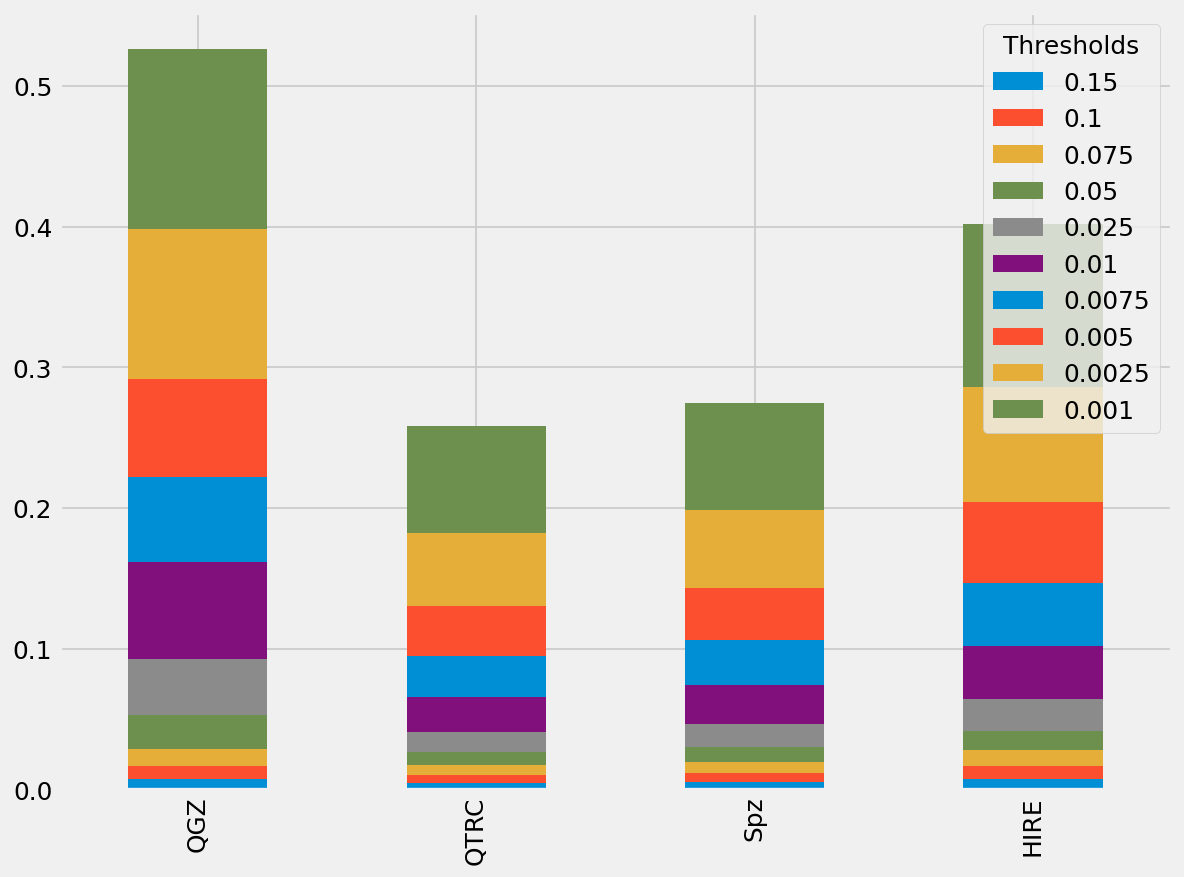

In [ ]:
plot_phone_cr = cr_phone_a.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_phone_cr['data_set'] = 'phone_a'
plot_phone_cr.plot.bar(stacked=True)

In [ ]:
plot_phone_cr

Thresholds,0.15,0.1,0.075,0.05,0.025,0.01,0.0075,0.005,0.0025,0.001,data_set
QGZ,0.007723,0.008948,0.012368,0.023756,0.040068,0.068776,0.060339,0.069917,0.106760,0.127683,phone_a
QTRC,0.004794,0.005875,0.007140,0.008746,0.014455,0.024822,0.029400,0.035589,0.051480,0.075815,phone_a
Spz,0.005632,0.006331,0.008006,0.010497,0.016389,0.027412,0.031871,0.036826,0.055582,0.076358,phone_a
HIRE,0.007823,0.009162,0.010887,0.013547,0.022781,0.037755,0.044820,0.057391,0.081645,0.116362,phone_a


In [ ]:
cr_phone_a_final_table = cr_phone_a_final.sum()

### Compression Latency

In [ ]:
cl_phone_a

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.068771,0.003345,0.003292,0.026823,0.310488,0.020705,0.019408,1.602076
0.1000,0.054799,0.004309,0.002289,0.028028,0.315603,0.023475,0.033675,1.602076
0.0750,0.055064,0.002974,0.002698,0.030293,0.312856,0.021730,0.047586,1.602076
0.0500,0.056176,0.003233,0.004080,0.028462,0.319486,0.022367,0.073812,1.602076
0.0250,0.085860,0.002243,0.002987,0.030759,0.324795,0.028815,0.135215,1.602076
0.0100,0.062080,0.004245,0.002702,0.046487,0.320362,0.030694,0.228370,1.602076
0.0075,0.053568,0.002326,0.001830,0.040824,0.350860,0.031421,0.254861,1.602076
0.0050,0.058775,0.002149,0.001903,0.042064,0.315993,0.030130,0.291805,1.602076
0.0025,0.056340,0.002807,0.002262,0.047603,0.314478,0.030756,0.352062,1.602076


In [ ]:
cl_phone_a_final_table = size_wp/cl_phone_a_final.sum()

### Decompression Latency

In [ ]:
dl_phone_a

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.212247,0.002823,0.020417,0.436784,0.764347,0.134921,0.019408,2148.80649
0.1000,0.171043,0.001020,0.025468,0.448925,0.728400,0.146063,0.033675,2148.80649
0.0750,0.172429,0.001279,0.028854,0.453930,0.729127,0.138333,0.047586,2148.80649
0.0500,0.171943,0.003437,0.016824,0.454261,0.835150,0.151410,0.073812,2148.80649
0.0250,0.179555,0.003607,0.069364,0.469736,0.837347,0.218098,0.135215,2148.80649
0.0100,0.179600,0.002188,0.064892,0.523746,0.827870,0.186820,0.228370,2148.80649
0.0075,0.172104,0.002269,0.285051,0.478911,0.760040,0.194316,0.254861,2148.80649
0.0050,0.179083,0.001514,0.227872,0.497283,0.755245,0.196431,0.291805,2148.80649
0.0025,0.173250,0.001107,0.048820,0.516836,0.782440,0.201641,0.352062,2148.80649


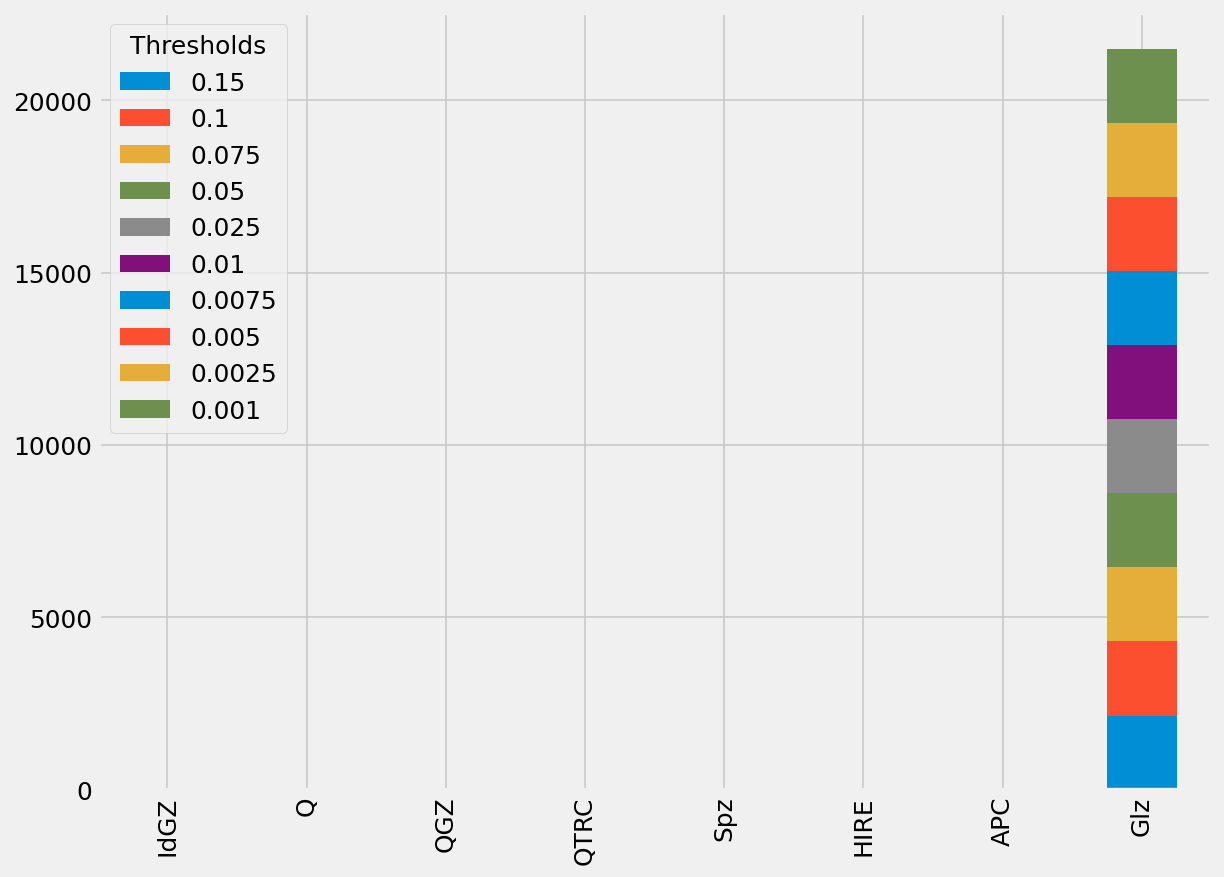

In [ ]:
dl_phone_a.T.plot.bar(stacked=True)

In [ ]:
dl_phone_a_final_table = size_wp/dl_phone_a_final.mean()

In [ ]:
dl_phone_a.drop(['Quantize','QuantizeGZ', 'Sprintz','Gorillaz'], axis = 1).T.plot.bar(stacked=True)
plt.title('Decompression latency for different error thresholds (phone accelerometer)')
plt.ylabel('Decompression latency')

In [ ]:
dl_phone_a_final.sum()

## **Phone gyroscope**

### Postprocessing

In [ ]:
#sample size = 4096 * 64
#start_level = 10
cr_phone_gy = pd.DataFrame([[0.4023281733194987,0.046905517578125,0.004378477732340495,0.003334681193033854,0.0028402010599772134,0.0066763559977213545,0.007206439971923828],[0.4023281733194987,0.062530517578125,0.005289554595947266,0.004079182942708333,0.004423618316650391,0.0061346689860026045,0.014464060465494791],[0.4023281733194987,0.062530517578125,0.007372220357259114,0.004894256591796875,0.00551144282023112,0.007762908935546875,0.021678606669108074],[0.4023281733194987,0.078155517578125,0.015054066975911459,0.005934397379557292,0.006321112314860026,0.009630203247070312,0.035902976989746094],[0.4023281733194987,0.093780517578125,0.030193805694580078,0.010606129964192709,0.012408733367919922,0.01702435811360677,0.07055600484212239],[0.4023281733194987,0.109405517578125,0.0588843027750651,0.014167149861653646,0.015166441599527994,0.025621414184570312,0.129180908203125],[0.4023281733194987,0.125030517578125,0.045745531717936196,0.017014821370442707,0.01826922098795573,0.030101776123046875,0.1460725466410319],[0.4023281733194987,0.125030517578125,0.055585384368896484,0.021394093831380207,0.022573153177897137,0.04073905944824219,0.16791280110677084],[0.4023281733194987,0.140655517578125,0.08854023615519206,0.030001322428385418,0.028283119201660156,0.05718866984049479,0.1941531499226888],[0.4023281733194987,0.156280517578125,0.10358762741088867,0.04484240214029948,0.0411070187886556,0.08496665954589844,0.21634610493977866]])

cr_phone_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_phone_gy_hier = cr_phone_gy['HIRE']
cr_phone_gy_hier = cr_phone_gy_hier[9]
cr_0 = np.repeat(0,9)
cr_phone_gy_hier = np.concatenate((cr_0, cr_phone_gy_hier), axis = None)

In [ ]:
cr_phone_gy_gorillaz = 0.591983954111735
cr_phone_gy_gorillaz = np.repeat(cr_phone_gy_gorillaz, 10)

In [ ]:
cr_phone_gy['Thresholds'] = thresholds
cr_phone_gy['Glz'] = cr_phone_gy_gorillaz
cr_phone_gy = cr_phone_gy.set_index('Thresholds')

cr_phone_gy_final = cr_phone_gy.drop('HIRE', axis = 1)
cr_phone_gy_final['HIRE'] = cr_phone_gy_hier

In [ ]:
cl_phone_gy = pd.DataFrame([[0.19261041599999995,0.0023972510000014324,0.028234916999998916,0.42920079199999606,0.7505717510000025,0.11479841599999929,0.007206439971923828],[0.1767461250000011,0.0017525410000018837,0.03141808400000912,0.44208637500000236,0.7615224999999981,0.12204783399999997,0.014464060465494791],[0.19106595799999582,0.0011357930000173155,0.01913341799996715,0.4431104580000067,0.8270973749999939,0.1307050409999988,0.021678606669108074],[0.1815490840000109,0.0010154579999834823,0.014734374999989086,0.44976691700000515,0.7184917090000056,0.11918595800000276,0.035902976989746094],[0.19724041599999964,0.0011242500000037126,0.07957200000001308,0.4632657499999482,0.8030129580000107,0.13653275000001486,0.07055600484212239],[0.1820169580000197,0.0011492089999478594,0.019304708000049686,0.458691999999985,0.8251483339999481,0.16247354199998654,0.129180908203125],[0.18591099999997596,0.0011614580000127717,0.05491391600003226,0.45338937500002885,0.848356458000012,0.17313866699998925,0.1460725466410319],[0.19278537499997128,0.0012210410000079719,0.11223954100006495,0.45025208399999883,0.8591713760000061,0.18570445900002142,0.16791280110677084],[0.1796875,0.0010219160000701777,0.06258445799994661,0.4899631669999849,0.7381126669999958,0.17764970799998991,0.1941531499226888],[0.17949729100001832,0.0010754590001056386,0.0713156250000111,0.4828984580000224,0.8085411260000228,0.18993150000005699,0.21634610493977866]])

cl_phone_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cl_phone_gy_hier = cl_phone_gy['HIRE']
cl_phone_gy_hier = cl_phone_gy_hier[9]
cl_0 = np.repeat(0,9)
cl_phone_gy_hier = np.concatenate((cl_0, cl_phone_gy_hier), axis = None)

In [ ]:
cl_phone_gy_gorillaz = 1.4976378750000023
cl_phone_gy_gorillaz = np.repeat(cl_phone_gy_gorillaz, 10)

In [ ]:
cl_phone_gy['Thresholds'] = thresholds
cl_phone_gy['Glz'] = cl_phone_gy_gorillaz
cl_phone_gy = cl_phone_gy.set_index('Thresholds')

cl_phone_gy_final = cl_phone_gy.drop('HIRE', axis = 1)
cl_phone_gy_final['HIRE'] = cl_phone_gy_hier

In [ ]:
dl_phone_gy = pd.DataFrame([[0.05335866599999939,0.002114124000000217,0.0017756660000003421,0.028106916999995235,0.30713145800000063,0.0175544999999957,0.007206439971923828],[0.050835332999994876,0.0020394989999914515,0.001743000000004713,0.02429612499999223,0.3084320000000105,0.02107837500000187,0.014464060465494791],[0.050573666000005346,0.0019489999999962038,0.001718708999987939,0.02787949999998318,0.3084441249999941,0.02082941599999799,0.021678606669108074],[0.048426250000005666,0.0017452919999811911,0.0017405410000321808,0.02974266700002204,0.30888537499998847,0.022740917000021454,0.035902976989746094],[0.048064292000020714,0.0021443750000003092,0.0018793329999766684,0.030352582999967126,0.30941754099995933,0.029154667000000245,0.07055600484212239],[0.04876462499998979,0.0021571249999965403,0.0017232080000439964,0.03479916599997068,0.31061562499996853,0.03052274999998872,0.129180908203125],[0.05118537499998865,0.002075042000058147,0.0031544579999831512,0.03364137500000197,0.3092088330000138,0.029646749999983513,0.1460725466410319],[0.049804666,0.001971749999995609,0.001810707999936767,0.0394135829999982,0.3097565409999561,0.029774458000019877,0.16791280110677084],[0.04680912500003842,0.002291624999998021,0.002156291999995119,0.04764004099996555,0.30787804199997026,0.030082041000014215,0.1941531499226888],[0.04876716699999406,0.0022799170000098457,0.0017857920000778904,0.05087550000007468,0.30796375000011267,0.029697625000039807,0.21634610493977866]])

dl_phone_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
dl_phone_gy_gorillaz = 1870.7965419579998
dl_phone_gy_gorillaz = np.repeat(dl_phone_gy_gorillaz, 10)

In [ ]:
dl_phone_gy['Thresholds'] = thresholds
dl_phone_gy['Glz'] = cr_phone_gy_gorillaz
dl_phone_gy = dl_phone_gy.set_index('Thresholds')

dl_phone_gy_final = dl_phone_gy

### Compression ratio 

In [ ]:
cr_phone_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.402328,0.046906,0.004378,0.003335,0.002840,0.006676,0.007206,0.591984
0.1000,0.402328,0.062531,0.005290,0.004079,0.004424,0.006135,0.014464,0.591984
0.0750,0.402328,0.062531,0.007372,0.004894,0.005511,0.007763,0.021679,0.591984
0.0500,0.402328,0.078156,0.015054,0.005934,0.006321,0.009630,0.035903,0.591984
0.0250,0.402328,0.093781,0.030194,0.010606,0.012409,0.017024,0.070556,0.591984
0.0100,0.402328,0.109406,0.058884,0.014167,0.015166,0.025621,0.129181,0.591984
0.0075,0.402328,0.125031,0.045746,0.017015,0.018269,0.030102,0.146073,0.591984
0.0050,0.402328,0.125031,0.055585,0.021394,0.022573,0.040739,0.167913,0.591984
0.0025,0.402328,0.140656,0.088540,0.030001,0.028283,0.057189,0.194153,0.591984


In [ ]:
cr_phone_gy_final_table = cr_phone_gy_final.sum()

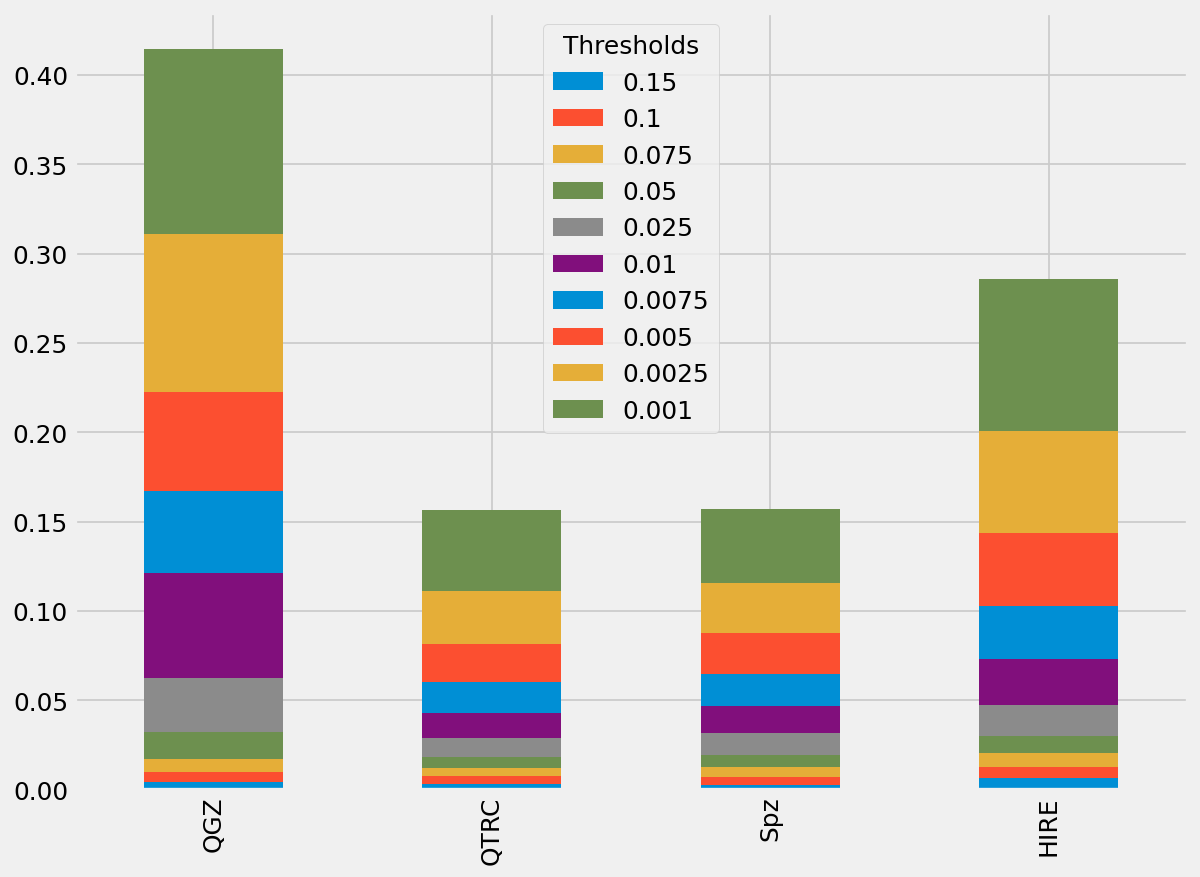

In [ ]:
plot_phone_g_cr = cr_phone_gy.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_phone_g_cr['data_set'] = 'phone_g'
plot_phone_g_cr.plot.bar(stacked=True)

In [ ]:
plot_phone_g_cr

Thresholds,0.15,0.1,0.075,0.05,0.025,0.01,0.0075,0.005,0.0025,0.001,data_set
QGZ,0.004378,0.005290,0.007372,0.015054,0.030194,0.058884,0.045746,0.055585,0.088540,0.103588,phone_g
QTRC,0.003335,0.004079,0.004894,0.005934,0.010606,0.014167,0.017015,0.021394,0.030001,0.044842,phone_g
Spz,0.002840,0.004424,0.005511,0.006321,0.012409,0.015166,0.018269,0.022573,0.028283,0.041107,phone_g
HIRE,0.006676,0.006135,0.007763,0.009630,0.017024,0.025621,0.030102,0.040739,0.057189,0.084967,phone_g


### Compression Latency

In [ ]:
cl_phone_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.192610,0.002397,0.028235,0.429201,0.750572,0.114798,0.007206,1.497638
0.1000,0.176746,0.001753,0.031418,0.442086,0.761522,0.122048,0.014464,1.497638
0.0750,0.191066,0.001136,0.019133,0.443110,0.827097,0.130705,0.021679,1.497638
0.0500,0.181549,0.001015,0.014734,0.449767,0.718492,0.119186,0.035903,1.497638
0.0250,0.197240,0.001124,0.079572,0.463266,0.803013,0.136533,0.070556,1.497638
0.0100,0.182017,0.001149,0.019305,0.458692,0.825148,0.162474,0.129181,1.497638
0.0075,0.185911,0.001161,0.054914,0.453389,0.848356,0.173139,0.146073,1.497638
0.0050,0.192785,0.001221,0.112240,0.450252,0.859171,0.185704,0.167913,1.497638
0.0025,0.179688,0.001022,0.062584,0.489963,0.738113,0.177650,0.194153,1.497638


In [ ]:
cl_phone_gy_final_table = size_wp/cl_phone_gy_final.sum()

In [ ]:
cl_phone_gy_final_table

IdGZ      27.072718
Q       3855.501372
QGZ      101.998294
QTRC      11.031185
Spz        6.338917
APC       50.156939
Glz        3.360703
HIRE     264.996404
dtype: float64

### Decompression Latency

In [ ]:
dl_phone_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.053359,0.002114,0.001776,0.028107,0.307131,0.017554,0.007206,0.591984
0.1000,0.050835,0.002039,0.001743,0.024296,0.308432,0.021078,0.014464,0.591984
0.0750,0.050574,0.001949,0.001719,0.027879,0.308444,0.020829,0.021679,0.591984
0.0500,0.048426,0.001745,0.001741,0.029743,0.308885,0.022741,0.035903,0.591984
0.0250,0.048064,0.002144,0.001879,0.030353,0.309418,0.029155,0.070556,0.591984
0.0100,0.048765,0.002157,0.001723,0.034799,0.310616,0.030523,0.129181,0.591984
0.0075,0.051185,0.002075,0.003154,0.033641,0.309209,0.029647,0.146073,0.591984
0.0050,0.049805,0.001972,0.001811,0.039414,0.309757,0.029774,0.167913,0.591984
0.0025,0.046809,0.002292,0.002156,0.047640,0.307878,0.030082,0.194153,0.591984


In [ ]:
dl_phone_gy_final.sum()

IdGZ    0.496589
Q       0.020768
QGZ     0.019488
QTRC    0.346747
Spz     3.087733
HIRE    0.261081
APC     1.003474
Glz     5.919840
dtype: float64

In [ ]:
dl_phone_gy_final_table = size_wp/dl_phone_gy_final.mean()

## **Watch Gyroscope**

### Postprocessing

In [ ]:
#sample size = 4096 * 128
#start_level = 10
cr_watch_gy = pd.DataFrame([[0.4497520128885905,0.046905517578125,0.0031687418619791665,0.0026111602783203125,0.0019938151041666665,0.0043570200602213545,0.00607601801554362],[0.4497520128885905,0.062530517578125,0.0040671030680338545,0.0035800933837890625,0.0029320716857910156,0.0050500233968098955,0.010951042175292969],[0.4497520128885905,0.062530517578125,0.005493481953938802,0.0040925343831380205,0.0036263465881347656,0.006318410237630208,0.01589790980021159],[0.4497520128885905,0.078155517578125,0.011019070943196615,0.0048828125,0.005396048227945964,0.007036844889322917,0.025798479715983074],[0.4497520128885905,0.093780517578125,0.020014286041259766,0.006930033365885417,0.00771633783976237,0.011309941609700521,0.053098042805989586],[0.4497520128885905,0.109405517578125,0.04839642842610677,0.010644276936848959,0.011564254760742188,0.019274393717447918,0.11100085576375325],[0.4497520128885905,0.125030517578125,0.03505404790242513,0.013170878092447916,0.013489723205566406,0.024657567342122395,0.13362407684326172],[0.4497520128885905,0.125030517578125,0.045013109842936196,0.016291300455729168,0.01627969741821289,0.03149859110514323,0.16533311208089194],[0.4497520128885905,0.140655517578125,0.08091433842976888,0.022602081298828125,0.023096879323323567,0.0441443125406901,0.2118226687113444],[0.4497520128885905,0.156280517578125,0.09750811258951823,0.0343621571858724,0.03267256418863932,0.069549560546875,0.25218359629313153]])

cr_watch_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_watch_gy_hier = cr_watch_gy['HIRE']
cr_watch_gy_hier = cr_watch_gy_hier[9]
cr_0 = np.repeat(0,9)
cr_watch_gy_hier = np.concatenate((cr_0, cr_watch_gy_hier), axis = None)

In [ ]:
cr_watch_gy_gorillaz = 0.6389346122741699
cr_watch_gy_gorillaz = np.repeat(cr_watch_gy_gorillaz, 10)

In [ ]:
cr_watch_gy['Thresholds'] = thresholds
cr_watch_gy['Glz'] = cr_watch_gy_gorillaz
cr_watch_gy = cr_watch_gy.set_index('Thresholds')

cr_watch_gy_final = cr_watch_gy.drop('HIRE', axis = 1)
cr_watch_gy_final['HIRE'] = cr_watch_gy_hier

In [ ]:
cl_watch_gy = pd.DataFrame([[0.17678645899999967,0.0031540830000018616,0.02141525000000044,0.43405141699999916,0.7005235420000062,0.1756405829999963,0.00607601801554362],[0.1696780409999974,0.0018992909999937524,0.03869262500001014,0.43712920800000177,0.7057455830000094,0.10352924999999402,0.010951042175292969],[0.16699716599998737,0.0009831670000011172,0.02621650000000386,0.43571245799998337,0.7164344169999879,0.14981500000001802,0.01589790980021159],[0.17226612500002147,0.006150542000000314,0.0192264590000093,0.4463975419999997,0.7991659999999854,0.1518731250000087,0.025798479715983074],[0.17159491599997523,0.0012182490000043344,0.028911917000016274,0.4431510420000109,0.8230001250000214,0.1371966250000014,0.053098042805989586],[0.16765116699997407,0.0012615409999625626,0.020300458999997772,0.4600824999999986,0.8451731249999739,0.14228491700004042,0.11100085576375325],[0.1993165829999839,0.0010087909999469957,0.08708879099998512,0.4567895420000241,0.7302042929999288,0.15461329200002183,0.13362407684326172],[0.16718541699998468,0.0013925009999411486,0.09496795799998381,0.4622525420000443,0.7393130420000489,0.17176958300001388,0.16533311208089194],[0.17040412500000457,0.0010598339999887685,0.04670604099999309,0.4917741659999706,0.8470674170000052,0.1844047079999882,0.2118226687113444],[0.1708086670000739,0.001020250000010492,0.0692798339998717,0.48557466699992347,0.8219589169999608,0.23553195800002413,0.25218359629313153]])

cl_watch_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cl_watch_gy_hier = cl_watch_gy['HIRE']
cl_watch_gy_hier = cl_watch_gy_hier[9]
cl_0 = np.repeat(0,9)
cl_watch_gy_hier = np.concatenate((cl_0, cl_watch_gy_hier), axis = None)

In [ ]:
cl_watch_gy_gorillaz = 1.6279764579999991
cl_watch_gy_gorillaz = np.repeat(cl_watch_gy_gorillaz, 10)

In [ ]:
cl_watch_gy['Thresholds'] = thresholds
cl_watch_gy['Glz'] = cl_watch_gy_gorillaz
cl_watch_gy = cl_watch_gy.set_index('Thresholds')

cl_watch_gy_final = cl_watch_gy.drop('HIRE', axis = 1)
cl_watch_gy_final['HIRE'] = cl_watch_gy_hier

In [ ]:
dl_watch_gy = pd.DataFrame([[0.051084125000000036,0.0028155410000003656,0.0038008329999961177,0.023464791999998624,0.3168576659999971,0.017967458000001102,0.00607601801554362],[0.06895091599999859,0.0019169579999953612,0.0022691249999979846,0.023915665999993507,0.307825624000003,0.02318687499999328,0.010951042175292969],[0.05200158400000987,0.0026840409999948633,0.0035797090000073695,0.024576666999990948,0.332988376000003,0.024073500000014292,0.01589790980021159],[0.04899591700001338,0.0019559569999785253,0.0022207920000028025,0.02583679200000688,0.3131579170000123,0.023899333999992223,0.025798479715983074],[0.0500171660000035,0.0038363749999916763,0.004395292000054951,0.028680874999963635,0.3113401239999689,0.026739041999974233,0.053098042805989586],[0.05028375000000551,0.002256959000021652,0.005631999999991422,0.027138125000021773,0.3128524999999627,0.02733995800002731,0.11100085576375325],[0.04870899999997391,0.0020490840000206845,0.0017072079999707057,0.03233504100001028,0.30850075099999685,0.029072166999981164,0.13362407684326172],[0.050287041999979465,0.002007417000015721,0.0023099159999446783,0.03374245800000608,0.3073843749999696,0.029930083000010654,0.16533311208089194],[0.04988733299995829,0.0021392509999600406,0.003220417000022735,0.03952137499999253,0.31277245799998354,0.029002084000012474,0.2118226687113444],[0.04791162499998336,0.002371541000002253,0.004306541999994806,0.04458999999997104,0.31275895800001763,0.030515665999928387,0.25218359629313153]])

dl_watch_gy.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
dl_watch_gy_gorillaz = 2118.0929326250002
dl_watch_gy_gorillaz = np.repeat(dl_watch_gy_gorillaz, 10)

In [ ]:
dl_watch_gy['Thresholds'] = thresholds
dl_watch_gy['Glz'] = dl_watch_gy_gorillaz
dl_watch_gy = dl_watch_gy.set_index('Thresholds')

dl_watch_gy_final = dl_watch_gy

### Compression ratio 

In [ ]:
cr_watch_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.449752,0.046906,0.003169,0.002611,0.001994,0.004357,0.006076,0.638935
0.1000,0.449752,0.062531,0.004067,0.003580,0.002932,0.005050,0.010951,0.638935
0.0750,0.449752,0.062531,0.005493,0.004093,0.003626,0.006318,0.015898,0.638935
0.0500,0.449752,0.078156,0.011019,0.004883,0.005396,0.007037,0.025798,0.638935
0.0250,0.449752,0.093781,0.020014,0.006930,0.007716,0.011310,0.053098,0.638935
0.0100,0.449752,0.109406,0.048396,0.010644,0.011564,0.019274,0.111001,0.638935
0.0075,0.449752,0.125031,0.035054,0.013171,0.013490,0.024658,0.133624,0.638935
0.0050,0.449752,0.125031,0.045013,0.016291,0.016280,0.031499,0.165333,0.638935
0.0025,0.449752,0.140656,0.080914,0.022602,0.023097,0.044144,0.211823,0.638935


In [ ]:
cr_watch_gy_final_table=cr_watch_gy_final.sum()

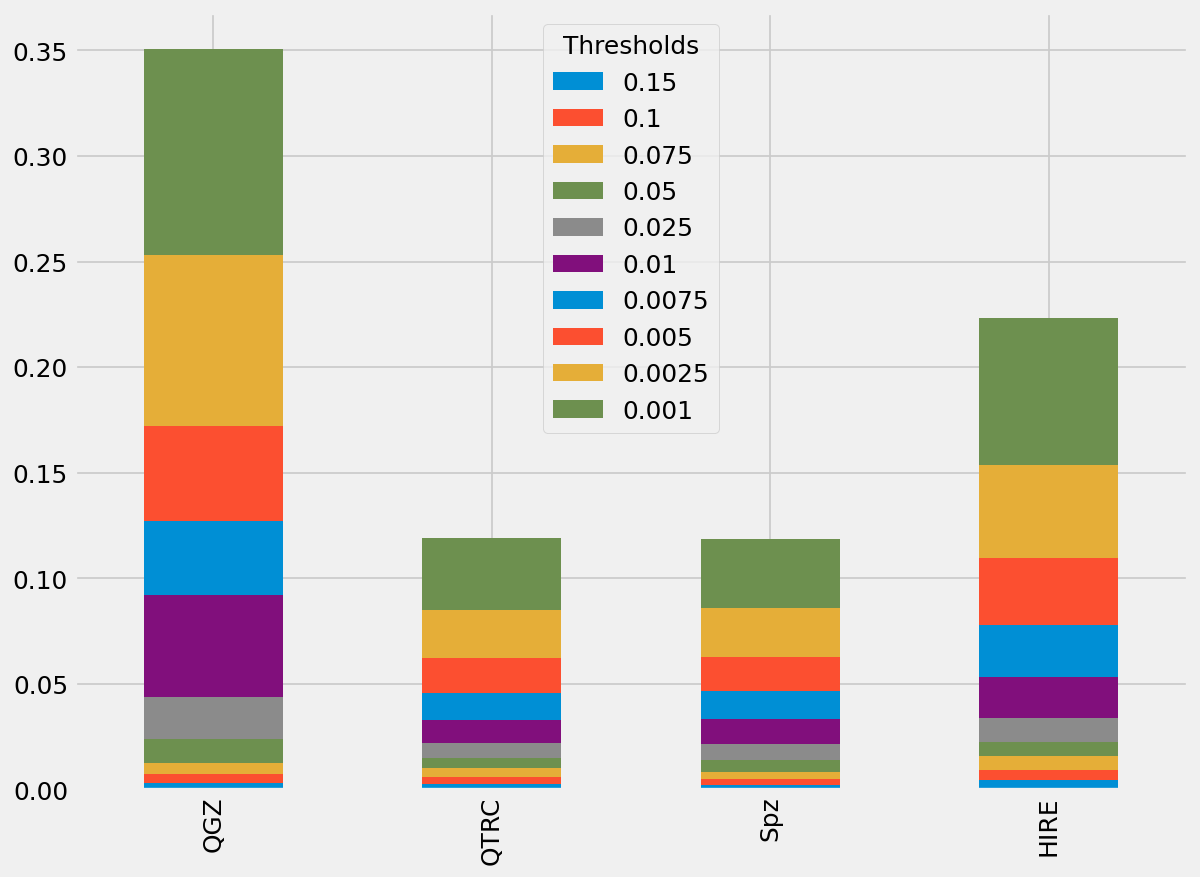

In [ ]:
plot_watch_gy_cr = cr_watch_gy.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_watch_gy_cr['data_set'] = 'watch_gy'
plot_watch_gy_cr.plot.bar(stacked=True)

### Compression Latency

In [ ]:
cl_watch_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.176786,0.003154,0.021415,0.434051,0.700524,0.175641,0.006076,1.627976
0.1000,0.169678,0.001899,0.038693,0.437129,0.705746,0.103529,0.010951,1.627976
0.0750,0.166997,0.000983,0.026217,0.435712,0.716434,0.149815,0.015898,1.627976
0.0500,0.172266,0.006151,0.019226,0.446398,0.799166,0.151873,0.025798,1.627976
0.0250,0.171595,0.001218,0.028912,0.443151,0.823000,0.137197,0.053098,1.627976
0.0100,0.167651,0.001262,0.020300,0.460082,0.845173,0.142285,0.111001,1.627976
0.0075,0.199317,0.001009,0.087089,0.456790,0.730204,0.154613,0.133624,1.627976
0.0050,0.167185,0.001393,0.094968,0.462253,0.739313,0.171770,0.165333,1.627976
0.0025,0.170404,0.001060,0.046706,0.491774,0.847067,0.184405,0.211823,1.627976


In [ ]:
cl_watch_gy_final_table = size_wp/cl_watch_gy_final.sum()

In [ ]:
cl_watch_gy_final_table

IdGZ      29.048014
Q       2628.499587
QGZ      111.153967
QTRC      11.054712
Spz        6.512338
APC       51.056897
Glz        3.091640
HIRE     213.691446
dtype: float64

### Decompression Latency

In [ ]:
dl_watch_gy

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.051084,0.002816,0.003801,0.023465,0.316858,0.017967,0.006076,2118.092933
0.1000,0.068951,0.001917,0.002269,0.023916,0.307826,0.023187,0.010951,2118.092933
0.0750,0.052002,0.002684,0.003580,0.024577,0.332988,0.024074,0.015898,2118.092933
0.0500,0.048996,0.001956,0.002221,0.025837,0.313158,0.023899,0.025798,2118.092933
0.0250,0.050017,0.003836,0.004395,0.028681,0.311340,0.026739,0.053098,2118.092933
0.0100,0.050284,0.002257,0.005632,0.027138,0.312852,0.027340,0.111001,2118.092933
0.0075,0.048709,0.002049,0.001707,0.032335,0.308501,0.029072,0.133624,2118.092933
0.0050,0.050287,0.002007,0.002310,0.033742,0.307384,0.029930,0.165333,2118.092933
0.0025,0.049887,0.002139,0.003220,0.039521,0.312772,0.029002,0.211823,2118.092933


In [ ]:
dl_watch_gy_final.sum()

IdGZ        0.518128
Q           0.024033
QGZ         0.033442
QTRC        0.303802
Spz         3.136439
HIRE        0.261726
APC         0.985786
Glz     21180.929326
dtype: float64

In [ ]:
dl_watch_gy_final_table = size_wp/dl_watch_gy_final.mean()

## **Watch accelerometer**

### Postprocessing

In [ ]:
#sample size = 4096 * 64
#start_level = 10
cr_watch_a = pd.DataFrame([[0.4643243153889974,0.046905517578125,0.0037523905436197915,0.0029201507568359375,0.0027818679809570312,0.005505879720052083,0.006398200988769531],[0.4643243153889974,0.062530517578125,0.0051415761311848955,0.0041039784749348955,0.003673712412516276,0.0053768157958984375,0.012660503387451172],[0.4643243153889974,0.062530517578125,0.006167252858479817,0.0041802724202473955,0.003962039947509766,0.0065326690673828125,0.018553415934244793],[0.4643243153889974,0.078155517578125,0.014437198638916016,0.006174723307291667,0.007172902425130208,0.009047190348307291,0.030480066935221355],[0.4643243153889974,0.093780517578125,0.027176539103190105,0.009806315104166666,0.011184215545654297,0.014748255411783854,0.06163247426350912],[0.4643243153889974,0.109405517578125,0.0578001340230306,0.014947255452473959,0.01656516393025716,0.023901621500651043,0.12479066848754883],[0.4643243153889974,0.125030517578125,0.045274575551350914,0.017978668212890625,0.019063631693522137,0.028922398885091145,0.14606300989786783],[0.4643243153889974,0.125030517578125,0.05640490849812826,0.022472381591796875,0.0234988530476888,0.03686650594075521,0.1764103571573893],[0.4643243153889974,0.140655517578125,0.09673627217610677,0.03302192687988281,0.035370190938313804,0.05417060852050781,0.22597821553548178],[0.4643243153889974,0.156280517578125,0.11816565195719402,0.05442682902018229,0.055464744567871094,0.0850537618001302,0.2899262110392253]])

cr_watch_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_watch_a_hier = cr_watch_a['HIRE']
cr_watch_a_hier = cr_watch_a_hier[9]
cr_0 = np.repeat(0,9)
cr_watch_a_hier = np.concatenate((cr_0, cr_watch_a_hier), axis = None)

In [ ]:
cr_watch_a_gorillaz = 0.8067142168680826
cr_watch_a_gorillaz = np.repeat(cr_watch_a_gorillaz, 10)

In [ ]:
cr_watch_a['Thresholds'] = thresholds
cr_watch_a['Glz'] = cr_watch_a_gorillaz
cr_watch_a = cr_watch_a.set_index('Thresholds')

cr_watch_a_final = cr_watch_a.drop('HIRE', axis = 1)
cr_watch_a_final['HIRE'] = cr_watch_a_hier

In [ ]:
cl_watch_a = pd.DataFrame([[0.17203804099999953,0.003909041999998308,0.021803166999994517,0.46346008299999397,0.7964752500000074,0.12023083300000081,0.006398200988769531],[0.18354916600000593,0.001113792000005276,0.04059504100000311,0.45323287500001186,0.7487716249999892,0.12952083300000083,0.012660503387451172],[0.17174899999999127,0.0009395419999975729,0.018101415999979054,0.45669766700001446,0.7266171240000006,0.12487404099999821,0.018553415934244793],[0.16968224999999393,0.000978540999994948,0.04007679199997938,0.4579648749999876,0.8146966249999821,0.11535691700001394,0.030480066935221355],[0.17183316599999898,0.0011810000000025411,0.07828466699999126,0.46504975000004833,0.8504534989999684,0.14146937500004242,0.06163247426350912],[0.16485775000001013,0.0010739159999957337,0.051290001000040775,0.483334291999995,0.8820548749999944,0.1590280420000454,0.12479066848754883],[0.16264737500000592,0.0012912909999727162,0.19668937500000538,0.49385879099997965,0.7546759580000071,0.1697278749999782,0.14606300989786783],[0.16250575000003664,0.0011377499999412066,0.19019775000003847,0.4835894999999937,0.7585130410000716,0.17813879200002702,0.1764103571573893],[0.16943641700004264,0.0010775010000543261,0.05130337500003179,0.49740675000003876,0.7926697920000265,0.18855829199992513,0.22597821553548178],[0.1903050409999878,0.0010944579998977133,0.04321379199996045,0.5160665419999759,0.8048048750000589,0.20084062499995525,0.2899262110392253]])

cl_watch_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cl_watch_a_hier = cl_watch_a['HIRE']
cl_watch_a_hier = cl_watch_a_hier[9]
cl_0 = np.repeat(0,9)
cl_watch_a_hier = np.concatenate((cl_0, cl_watch_a_hier), axis = None)

In [ ]:
cl_watch_a_gorillaz = 1.6492955420000044
cl_watch_a_gorillaz = np.repeat(cl_watch_a_gorillaz, 10)

In [ ]:
cl_watch_a['Thresholds'] = thresholds
cl_watch_a['Glz'] = cl_watch_a_gorillaz
cl_watch_a = cl_watch_a.set_index('Thresholds')

cl_watch_a_final = cl_watch_a.drop('HIRE', axis = 1)
cl_watch_a_final['HIRE'] = cl_watch_a_hier

In [ ]:
dl_watch_a = pd.DataFrame([[0.05370816699999992,0.0021842489999990278,0.011640290999999081,0.025411708000000033,0.3087919989999932,0.01820491699999849,0.006398200988769531],[0.06075691600000255,0.00281195800000944,0.0017270839999952159,0.024900250000001733,0.31125941700000226,0.02366237500000068,0.012660503387451172],[0.056431333000006134,0.0020219999999966376,0.0026327089999824693,0.02099250000000552,0.3073294579999981,0.02098170799999366,0.018553415934244793],[0.05329958300001181,0.0034661260000063976,0.0017380000000173368,0.023306958999995686,0.30965045900001087,0.024203624999984186,0.030480066935221355],[0.055239083999993,0.00235520900002939,0.002611833999992541,0.030737458999965384,0.31114854199995534,0.02661254099996313,0.06163247426350912],[0.05191424999998162,0.0021145009999941067,0.004562124999949901,0.035467750000009346,0.3134131660000321,0.028701915999988614,0.12479066848754883],[0.056099915999993755,0.0023561250000057044,0.002094499999998334,0.038472375000026204,0.3150408750000224,0.028846124999972744,0.14606300989786783],[0.05635687500000586,0.001666749999969852,0.0035178759999894282,0.045177040999988094,0.3213834580000139,0.03009970800002293,0.1764103571573893],[0.05958091700000523,0.002168083000015031,0.0023849579999932757,0.04015679200000477,0.31879266599992206,0.029966292000040085,0.22597821553548178],[0.052124250000019856,0.0021583329998975387,0.001842833000068822,0.04771645799996804,0.3095434579998937,0.03009325000004992,0.2899262110392253]])

dl_watch_a.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
dl_watch_a_gorillaz = 2313.460669042
dl_watch_a_gorillaz = np.repeat(dl_watch_a_gorillaz, 10)

In [ ]:
dl_watch_a['Thresholds'] = thresholds
dl_watch_a['Glz'] = dl_watch_a_gorillaz
dl_watch_a = dl_watch_a.set_index('Thresholds')

dl_watch_a_final = dl_watch_a

### Compression ratio 

In [ ]:
cr_watch_a

NameError: ignored

In [ ]:
cr_watch_a_final_table = cr_watch_a_final.sum()

NameError: ignored

In [ ]:
plot_watch_a_cr = cr_watch_a.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_watch_a_cr['data_set'] = 'watch_a'
plot_watch_a_cr.plot.bar(stacked=True)

NameError: ignored

### Compression Latency

In [ ]:
cl_watch_a

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.172038,0.003909,0.021803,0.463460,0.796475,0.120231,0.006398,1.649296
0.1000,0.183549,0.001114,0.040595,0.453233,0.748772,0.129521,0.012661,1.649296
0.0750,0.171749,0.000940,0.018101,0.456698,0.726617,0.124874,0.018553,1.649296
0.0500,0.169682,0.000979,0.040077,0.457965,0.814697,0.115357,0.030480,1.649296
0.0250,0.171833,0.001181,0.078285,0.465050,0.850453,0.141469,0.061632,1.649296
0.0100,0.164858,0.001074,0.051290,0.483334,0.882055,0.159028,0.124791,1.649296
0.0075,0.162647,0.001291,0.196689,0.493859,0.754676,0.169728,0.146063,1.649296
0.0050,0.162506,0.001138,0.190198,0.483589,0.758513,0.178139,0.176410,1.649296
0.0025,0.169436,0.001078,0.051303,0.497407,0.792670,0.188558,0.225978,1.649296


In [ ]:
cl_watch_a_final_table = size_wp/cl_watch_a_final.sum()

In [ ]:
cl_watch_a_final_table

IdGZ      29.286075
Q       3648.023034
QGZ       68.800211
QTRC      10.550145
Spz        6.347145
APC       46.053144
Glz        3.051677
HIRE     250.602509
dtype: float64

### Decompression Latency

In [ ]:
dl_watch_a

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.053708,0.002184,0.011640,0.025412,0.308792,0.018205,0.006398,2313.460669
0.1000,0.060757,0.002812,0.001727,0.024900,0.311259,0.023662,0.012661,2313.460669
0.0750,0.056431,0.002022,0.002633,0.020993,0.307329,0.020982,0.018553,2313.460669
0.0500,0.053300,0.003466,0.001738,0.023307,0.309650,0.024204,0.030480,2313.460669
0.0250,0.055239,0.002355,0.002612,0.030737,0.311149,0.026613,0.061632,2313.460669
0.0100,0.051914,0.002115,0.004562,0.035468,0.313413,0.028702,0.124791,2313.460669
0.0075,0.056100,0.002356,0.002094,0.038472,0.315041,0.028846,0.146063,2313.460669
0.0050,0.056357,0.001667,0.003518,0.045177,0.321383,0.030100,0.176410,2313.460669
0.0025,0.059581,0.002168,0.002385,0.040157,0.318793,0.029966,0.225978,2313.460669


In [ ]:
dl_watch_a_final.sum()

IdGZ        0.555511
Q           0.023303
QGZ         0.034752
QTRC        0.332339
Spz         3.126353
HIRE        0.261372
APC         1.092893
Glz     23134.606690
dtype: float64

In [ ]:
dl_watch_a_final_table = size_wp/dl_watch_a_final.mean()

## **Sensor HT**

### Postprocessing

In [ ]:
#sample size = 4096 * 128
#start_level = 11
cr_sensor_ht = pd.DataFrame([[0.7697647484866056,0.04688193581321023,0.0017300519076260653,0.0004694678566672585,0.00025218183344060725,0.0009986704046075995,0.0019189661199396307],[0.7697647484866056,0.06250693581321022,0.0009462183172052556,0.0006117387251420455,0.00033818591724742544,0.001173886385830966,0.0023221319372003727],[0.7697647484866056,0.06250693581321022,0.0013054500926624644,0.0007692683826793324,0.0005748922174627131,0.001430511474609375,0.00276294621554288],[0.7697647484866056,0.07813193581321022,0.0055217742919921875,0.0009823712435635653,0.0007590814070268111,0.0018499547784978693,0.0036962032318115234],[0.7697647484866056,0.09375693581321022,0.006449135867032138,0.0015759034590287642,0.0012410554018887606,0.0030584335327148438,0.006601116874001243],[0.7697647484866056,0.10938193581321022,0.02262093804099343,0.0027393861250443892,0.0017495588822798295,0.005527843128551136,0.014582959088412199],[0.7697647484866056,0.12500693581321023,0.005989226427945224,0.0032032186334783382,0.002093228426846591,0.006633411754261364,0.018639109351418236],[0.7697647484866056,0.12500693581321023,0.008408611471002752,0.003962690179998224,0.0034978606484153056,0.008396235379305754,0.026105815714055843],[0.7697647484866056,0.14063193581321023,0.05548784949562766,0.005694302645596591,0.004849910736083984,0.012539603493430397,0.0447677265514027],[0.7697647484866056,0.15625693581321023,0.06384598125110973,0.008634480563077059,0.007594650441950018,0.02070860429243608,0.08516990054737437]])

cr_sensor_ht.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_sensor_ht_hier = cr_sensor_ht['HIRE']
cr_sensor_ht_hier = cr_sensor_ht_hier[9]
cr_0 = np.repeat(0,9)
cr_sensor_ht_hier = np.concatenate((cr_0, cr_sensor_ht_hier), axis = None)

In [ ]:
cr_sensor_ht_gorillaz = 0.7656944231553511
cr_sensor_ht_gorillaz = np.repeat(cr_sensor_ht_gorillaz, 10)

In [ ]:
cr_sensor_ht['Thresholds'] = thresholds
cr_sensor_ht['Glz'] = cr_sensor_ht_gorillaz
cr_sensor_ht = cr_sensor_ht.set_index('Thresholds')

cr_sensor_ht_final = cr_sensor_ht.drop('HIRE', axis = 1)
#cr_sensor_ht_final = cr_sensor_ht
cr_sensor_ht_final['HIRE'] = cr_sensor_ht_hier

In [ ]:
cl_sensor_ht = pd.DataFrame([[1.623281667,0.01101870900001245,0.04067737500000135,2.848499541999985,4.87107050000003,0.7111703749999947,0.0019189661199396307],[1.6438011669999923,0.008714166000004298,0.04702183300003071,2.8498274170000286,4.889243332999968,0.6941822500000399,0.0023221319372003727],[1.6332102080000368,0.008540166999978283,0.0582094579999648,2.8603049999999257,5.48825950100013,0.7151192080000328,0.00276294621554288],[1.6135439170000154,0.010153749999972206,0.09901049999984934,3.3354588750000858,5.517483874999925,0.7448060839999471,0.0036962032318115234],[1.619056541999953,0.010235917000045447,0.08735683300005803,2.8516527920000954,5.757759250000163,0.7356512090000251,0.006601116874001243],[1.6103816659999666,0.0077176240001790575,0.13931766699988657,2.907437833000131,4.961860083999454,0.7478105420000247,0.014582959088412199],[1.5905470829998194,0.00943808399961199,0.12223804199993538,3.02116445799993,4.917580416000419,0.8564508750000641,0.018639109351418236],[1.6484479589998955,0.009864376000223274,0.20210766700029126,2.915196584000114,6.187919417000103,0.8803264579996721,0.026105815714055843],[1.5640686250003455,0.01708920900045996,0.22402308299979268,3.0683252090002497,6.435371458000191,0.8575263329998961,0.0447677265514027],[1.671017749999919,0.008900500000436296,0.2492723330001354,3.0669608749999497,6.500935334000133,1.0274488340000971,0.08516990054737437]])

cl_sensor_ht.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cl_sensor_ht_hier = cl_sensor_ht['HIRE']
cl_sensor_ht_hier = cl_sensor_ht_hier[9]
cl_0 = np.repeat(0,9)
cl_sensor_ht_hier = np.concatenate((cl_0, cl_sensor_ht_hier), axis = None)

In [ ]:
cl_sensor_ht_gorillaz = 16.680498625000002
cl_sensor_ht_gorillaz = np.repeat(cl_sensor_ht_gorillaz, 10)

In [ ]:
cl_sensor_ht['Thresholds'] = thresholds
cl_sensor_ht['Glz'] = cl_sensor_ht_gorillaz
cl_sensor_ht = cl_sensor_ht.set_index('Thresholds')

cl_sensor_ht_final = cl_sensor_ht
cl_sensor_ht_final = cl_sensor_ht.drop('HIRE', axis = 1)
cl_sensor_ht_final['HIRE'] = cl_sensor_ht_hier

In [ ]:
dl_sensor_ht = pd.DataFrame([[0.4890408750000006,0.061691041999992535,0.04760829100001729,0.08099945899999739,2.1220125000000394,0.13312062500000366,0.0019189661199396307],[0.4787319590000152,0.03473333299996284,0.050792873999967014,0.0757392919999802,2.14534920899996,0.1854190409999319,0.0023221319372003727],[0.4748974999999973,0.036949917000015375,0.04842912500009788,0.08392875000004096,2.163731333999749,0.1713068750000275,0.00276294621554288],[0.4725284579999425,0.04815458400003081,0.05561050000005707,0.07446691700010888,2.1629524170000423,0.19602641700021195,0.0036962032318115234],[0.48071824999988166,0.040143583000144645,0.049444375000121,0.07515254099985214,2.1468643750001775,0.20842254099989077,0.006601116874001243],[0.4760807919999479,0.03458795800042935,0.051849500000571425,0.08599604100027136,2.124230749999697,0.20784658299999137,0.014582959088412199],[0.4696681670002363,0.03514075100019909,0.0361769169994659,0.09164654200003497,2.1525603330001104,0.204490000000078,0.018639109351418236],[0.48964545800026826,0.0527612500000032,0.045320166000237805,0.0937293340002725,2.158457125000041,0.21020879200023046,0.026105815714055843],[0.47294270800011873,0.0341433749999851,0.046938833000240265,0.11637570799985042,2.1516236250004113,0.21003874999996697,0.0447677265514027],[0.4786867079997137,0.03439695900033257,0.04685612599951128,0.18283737499996278,2.13468712500071,0.2119554999999309,0.08516990054737437]])

dl_sensor_ht.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
dl_sensor_ht_gorillaz = 29753.763855875
dl_sensor_ht_gorillaz = np.repeat(dl_sensor_ht_gorillaz, 10)

In [ ]:
dl_sensor_ht['Thresholds'] = thresholds
dl_sensor_ht['Glz'] = dl_sensor_ht_gorillaz
dl_sensor_ht = dl_sensor_ht.set_index('Thresholds')
dl_sensor_ht['HIRE'] = [0.1220132920000001,0.1384129999999999,0.14722429199999976,0.16505687499999944,0.1827498340000009,0.20368345800000043,0.2129390830000002,0.2186040420000026,0.22974100000000064,0.24630266700000192]
dl_sensor_ht_final = dl_sensor_ht

### Compression ratio 

In [ ]:
cr_sensor_ht

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.769765,0.046882,0.001730,0.000469,0.000252,0.000999,0.001919,0.765694
0.1000,0.769765,0.062507,0.000946,0.000612,0.000338,0.001174,0.002322,0.765694
0.0750,0.769765,0.062507,0.001305,0.000769,0.000575,0.001431,0.002763,0.765694
0.0500,0.769765,0.078132,0.005522,0.000982,0.000759,0.001850,0.003696,0.765694
0.0250,0.769765,0.093757,0.006449,0.001576,0.001241,0.003058,0.006601,0.765694
0.0100,0.769765,0.109382,0.022621,0.002739,0.001750,0.005528,0.014583,0.765694
0.0075,0.769765,0.125007,0.005989,0.003203,0.002093,0.006633,0.018639,0.765694
0.0050,0.769765,0.125007,0.008409,0.003963,0.003498,0.008396,0.026106,0.765694
0.0025,0.769765,0.140632,0.055488,0.005694,0.004850,0.012540,0.044768,0.765694


In [ ]:
cr_sensor_ht_final_table = sensor_ht_size/cr_sensor_ht_final.sum()

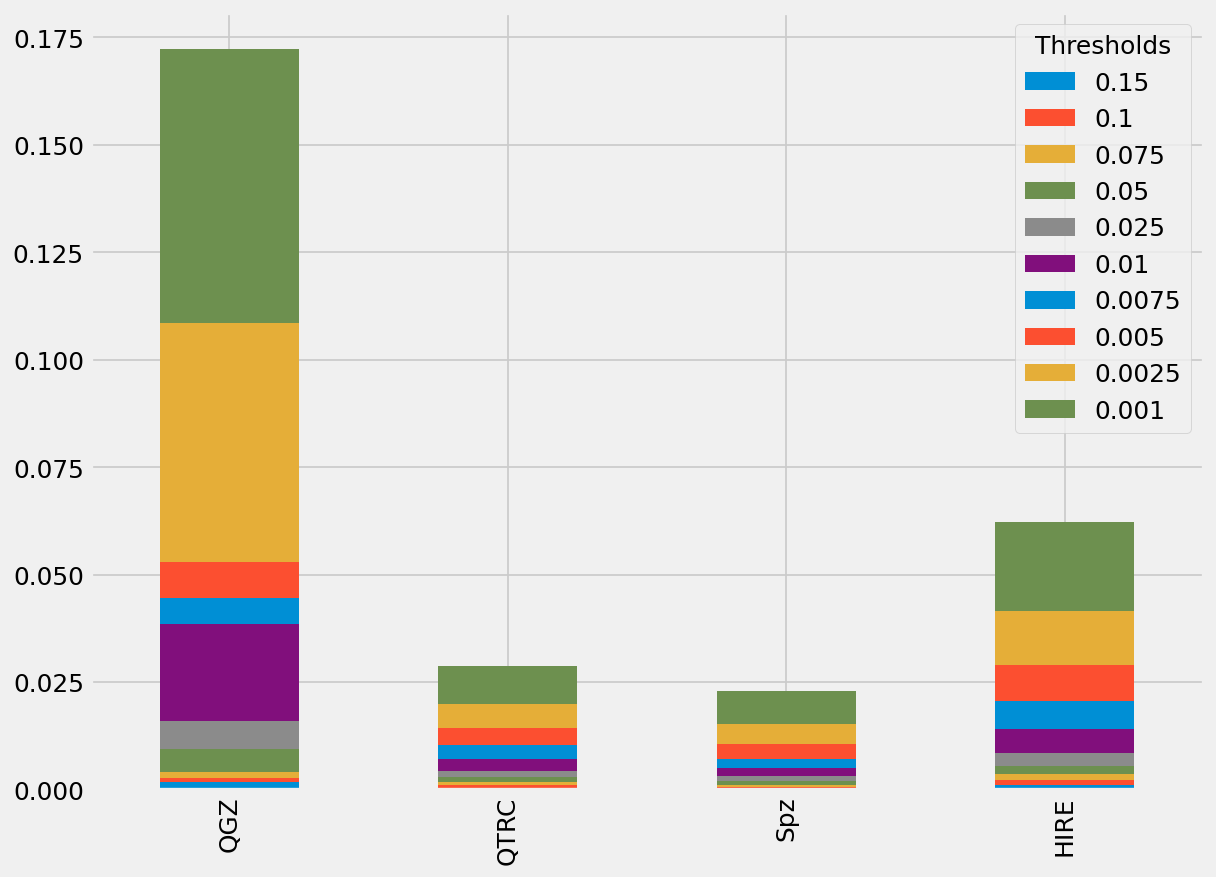

In [ ]:
plot_sensor_ht_cr = cr_sensor_ht.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_sensor_ht_cr['data_set'] = 'sensor_ht'
plot_sensor_ht_cr.plot.bar(stacked=True)

### Decompression Latency

In [ ]:
dl_sensor_ht

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.489041,0.061691,0.047608,0.080999,2.122013,0.122013,0.001919,29753.763856
0.1000,0.478732,0.034733,0.050793,0.075739,2.145349,0.138413,0.002322,29753.763856
0.0750,0.474897,0.036950,0.048429,0.083929,2.163731,0.147224,0.002763,29753.763856
0.0500,0.472528,0.048155,0.055611,0.074467,2.162952,0.165057,0.003696,29753.763856
0.0250,0.480718,0.040144,0.049444,0.075153,2.146864,0.182750,0.006601,29753.763856
0.0100,0.476081,0.034588,0.051850,0.085996,2.124231,0.203683,0.014583,29753.763856
0.0075,0.469668,0.035141,0.036177,0.091647,2.152560,0.212939,0.018639,29753.763856
0.0050,0.489645,0.052761,0.045320,0.093729,2.158457,0.218604,0.026106,29753.763856
0.0025,0.472943,0.034143,0.046939,0.116376,2.151624,0.229741,0.044768,29753.763856


In [ ]:
dl_sensor_ht.sum()

IdGZ         4.782941
Q            0.412703
QGZ          0.479027
QTRC         0.960872
Spz         21.462469
HIRE         1.866728
APC          0.206567
Glz     297537.638559
dtype: float64

In [ ]:
dl_sensor_ht_final_table = sensor_ht_size/dl_sensor_ht_final.mean()

### Compression Latency

In [ ]:
cl_sensor_ht

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,1.623282,0.011019,0.040677,2.848500,4.871071,0.711170,0.001919,16.680499
0.1000,1.643801,0.008714,0.047022,2.849827,4.889243,0.694182,0.002322,16.680499
0.0750,1.633210,0.008540,0.058209,2.860305,5.488260,0.715119,0.002763,16.680499
0.0500,1.613544,0.010154,0.099010,3.335459,5.517484,0.744806,0.003696,16.680499
0.0250,1.619057,0.010236,0.087357,2.851653,5.757759,0.735651,0.006601,16.680499
0.0100,1.610382,0.007718,0.139318,2.907438,4.961860,0.747811,0.014583,16.680499
0.0075,1.590547,0.009438,0.122238,3.021164,4.917580,0.856451,0.018639,16.680499
0.0050,1.648448,0.009864,0.202108,2.915197,6.187919,0.880326,0.026106,16.680499
0.0025,1.564069,0.017089,0.224023,3.068325,6.435371,0.857526,0.044768,16.680499


In [ ]:
cl_sensor_ht_final_table = sensor_ht_size/cl_sensor_ht_final.sum()

In [ ]:
cl_sensor_ht_final_table

IdGZ      2.846634
Q       454.054729
QGZ      36.372215
QTRC      1.553075
Spz       0.831388
APC     223.486366
Glz       0.276760
HIRE     44.931561
dtype: float64

## **Power**

### Postprocessing

In [ ]:
#sample size = 128*4096
#block size 512
#start_level = 5
cr_power = pd.DataFrame([[0.21715930530003139,0.046879359654017856,0.008176769529070173,0.004075527191162109,0.004449384553091866,0.008295808519635881,0.009977834565298898],[0.21715930530003139,0.06250435965401786,0.008396114621843611,0.004962171827043805,0.005438957895551409,0.00888817650931222,0.016091431890215193],[0.21715930530003139,0.06250435965401786,0.012369871139526367,0.006809711456298828,0.008822951998029436,0.011136054992675781,0.02200819764818464],[0.21715930530003139,0.07812935965401786,0.02426866122654506,0.008653436388288225,0.011021886553083147,0.014885970524379186,0.03185164928436279],[0.21715930530003139,0.09375435965401786,0.03752698217119489,0.013959612165178572,0.01758464745112828,0.023824555533272878,0.05015671253204346],[0.21715930530003139,0.10937935965401786,0.06398848124912807,0.02093771525791713,0.023937702178955078,0.03777245112827846,0.07024008887154716],[0.21715930530003139,0.12500435965401785,0.047661031995500834,0.023400170462472097,0.026551365852355957,0.04403802326747349,0.07618754250662667],[0.21715930530003139,0.12500435965401785,0.05382200649806431,0.026935577392578125,0.0342026948928833,0.05357565198625837,0.08186944893428258],[0.21715930530003139,0.14062935965401785,0.08763761179787773,0.032926014491489956,0.04017409256526402,0.06915392194475446,0.09222042560577393],[0.21715930530003139,0.15625435965401785,0.09263832228524345,0.04043667657034738,0.04943333353315081,0.0909569604056222,0.10075647490365165]])

cr_power.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_power_hier = cr_power['HIRE']
cr_power_hier = cr_power_hier[9]
cr_0 = np.repeat(0,9)
cr_power_hier = np.concatenate((cr_0, cr_power_hier), axis = None)

In [ ]:
cr_power_gorillaz = 0.29555494444710867
cr_power_gorillaz = np.repeat(cr_power_gorillaz, 10)

In [ ]:
cr_power['Thresholds'] = thresholds
cr_power['Glz'] = cr_power_gorillaz
cr_power = cr_power.set_index('Thresholds')

cr_power_final = cr_power.drop('HIRE', axis = 1)
cr_power_final['HIRE'] = cr_power_hier

In [ ]:
cl_power = pd.DataFrame([[1.544116958,0.0069918330000007245,0.14666137500000787,1.904536874999991,3.079281958000024,1.514482541999996,0.010945728846958705],[1.3973984159999873,0.0045172080000384085,0.26259104199999683,1.8438702920000196,3.527252874999988,1.5455289579999771,0.017553056989397322],[1.4026122500000042,0.004954498999950374,0.26304466700003104,1.8977248749999944,3.5081973339999877,1.6827570419999347,0.02373504638671875],[1.461622082999952,0.006285583000021688,0.7105393330000425,2.404870583999923,3.682525999999939,1.6519547920000832,0.03378500257219587],[1.4508482500000355,0.012860875000114902,0.9482292499999403,2.413796500000217,3.4909548329999325,1.7040582080001059,0.050731931413922994],[1.423852042000135,0.005277249999835476,1.0658702089999679,1.9871976250001353,3.204961793000166,1.7436247499999808,0.07072837012154716],[1.5740806660000999,0.010847874999853957,0.786377209000193,2.479067875000055,3.7103127919997405,2.30771916599997,0.07678471292768206],[1.4317082499999287,0.011428875000092376,0.8591492499999731,2.01404212500006,3.644971250000026,1.7846160000003692,0.08307021004813057],[1.4022852500002045,0.005283250000047701,1.6428015000001324,2.010343459000069,3.742154874999869,1.8438094169996475,0.09245385442461286],[1.4140687080002863,0.005048457999691891,1.578949124999781,2.0373969590000343,3.717034459000388,2.02011712500007,0.10105187552315849]])

cl_power.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']

In [ ]:
cl_power_hier = cl_power['HIRE']
cl_power_hier = cl_power_hier[9]
cl_0 = np.repeat(0,9)
cl_power_hier = np.concatenate((cl_0, cl_power_hier), axis = None)

In [ ]:
cl_power_gorillaz = 5.349924417
cl_power_gorillaz = np.repeat(cl_power_gorillaz, 10)

In [ ]:
cl_power['Thresholds'] = thresholds
cl_power['Glz'] = cl_power_gorillaz
cl_power = cl_power.set_index('Thresholds')

cl_power_final = cl_power.drop('HIRE', axis = 1)
cl_power_final['HIRE'] = cl_power_hier

In [ ]:
dl_power = pd.DataFrame([[0.3064445830000002,0.017206375000007768,0.016924165999995466,0.0851941249999868,1.3465458330000217,0.3667425409999794,0.010945728846958705],[0.19455966700002136,0.017860792000021775,0.01641758400000981,0.08439833400001362,1.3536421239999754,0.38558895799997117,0.017553056989397322],[0.1900397919999932,0.016773292000038964,0.015566791000082958,0.10108275000004596,1.3862245419999226,0.3903191250000191,0.02373504638671875],[0.20343837500001882,0.01739916799999719,0.03258900100001938,0.13738662499997645,1.362794041999905,0.3947837089999666,0.03378500257219587],[0.1872473749999699,0.03644341699987308,0.031903000000056636,0.14488108400018973,1.3752050839998446,0.4192707919999066,0.050731931413922994],[0.19109000000003107,0.023281250000309228,0.024055374999989,0.16286762499998986,1.3556290409999292,0.41246541600003184,0.07072837012154716],[0.24714866599993002,0.0348191670000233,0.04351004099999045,0.18725116599989633,1.4118867500001215,0.41380370799993216,0.07678471292768206],[0.26207799999997405,0.01793429200006358,0.01554995800006509,0.18594149999989895,1.352158916999997,0.4134861659999842,0.08307021004813057],[0.19002791699995214,0.015877040999839664,0.016302041999551875,0.1941786659999707,1.34783704199981,0.42791833399996904,0.09245385442461286],[0.1875844999999572,0.014982417000283021,0.016132167000250774,0.20752604199969937,1.3481679999995322,0.41378033299997696,0.10105187552315849]])

dl_power.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']

In [ ]:
dl_power_gorillaz = 8508.502780417
dl_power_gorillaz = np.repeat(dl_power_gorillaz, 10)

In [ ]:
dl_power['Thresholds'] = thresholds
dl_power['Glz'] = dl_power_gorillaz
dl_power = dl_power.set_index('Thresholds')

dl_power_final = dl_power

### Compression ratio 

In [ ]:
cr_power

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.217159,0.046879,0.008177,0.004076,0.004449,0.008296,0.009978,0.295555
0.1000,0.217159,0.062504,0.008396,0.004962,0.005439,0.008888,0.016091,0.295555
0.0750,0.217159,0.062504,0.012370,0.006810,0.008823,0.011136,0.022008,0.295555
0.0500,0.217159,0.078129,0.024269,0.008653,0.011022,0.014886,0.031852,0.295555
0.0250,0.217159,0.093754,0.037527,0.013960,0.017585,0.023825,0.050157,0.295555
0.0100,0.217159,0.109379,0.063988,0.020938,0.023938,0.037772,0.070240,0.295555
0.0075,0.217159,0.125004,0.047661,0.023400,0.026551,0.044038,0.076188,0.295555
0.0050,0.217159,0.125004,0.053822,0.026936,0.034203,0.053576,0.081869,0.295555
0.0025,0.217159,0.140629,0.087638,0.032926,0.040174,0.069154,0.092220,0.295555


In [ ]:
cr_power_final_table = cr_power_final.sum()

### Decompression Latency

In [ ]:
dl_power

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.306445,0.017206,0.016924,0.085194,1.346546,0.366743,0.010946,8508.50278
0.1000,0.194560,0.017861,0.016418,0.084398,1.353642,0.385589,0.017553,8508.50278
0.0750,0.190040,0.016773,0.015567,0.101083,1.386225,0.390319,0.023735,8508.50278
0.0500,0.203438,0.017399,0.032589,0.137387,1.362794,0.394784,0.033785,8508.50278
0.0250,0.187247,0.036443,0.031903,0.144881,1.375205,0.419271,0.050732,8508.50278
0.0100,0.191090,0.023281,0.024055,0.162868,1.355629,0.412465,0.070728,8508.50278
0.0075,0.247149,0.034819,0.043510,0.187251,1.411887,0.413804,0.076785,8508.50278
0.0050,0.262078,0.017934,0.015550,0.185941,1.352159,0.413486,0.083070,8508.50278
0.0025,0.190028,0.015877,0.016302,0.194179,1.347837,0.427918,0.092454,8508.50278


In [ ]:
dl_power.sum()

IdGZ        2.159659
Q           0.212577
QGZ         0.228950
QTRC        1.490708
Spz        13.640091
HIRE        4.038159
APC         0.560840
Glz     85085.027804
dtype: float64

In [ ]:
dl_power_final_table = power_size/dl_power_final.mean()

### Compression Latency

In [ ]:
cl_power

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,1.544117,0.006992,0.146661,1.904537,3.079282,1.514483,0.010946,5.349924
0.1000,1.397398,0.004517,0.262591,1.843870,3.527253,1.545529,0.017553,5.349924
0.0750,1.402612,0.004954,0.263045,1.897725,3.508197,1.682757,0.023735,5.349924
0.0500,1.461622,0.006286,0.710539,2.404871,3.682526,1.651955,0.033785,5.349924
0.0250,1.450848,0.012861,0.948229,2.413797,3.490955,1.704058,0.050732,5.349924
0.0100,1.423852,0.005277,1.065870,1.987198,3.204962,1.743625,0.070728,5.349924
0.0075,1.574081,0.010848,0.786377,2.479068,3.710313,2.307719,0.076785,5.349924
0.0050,1.431708,0.011429,0.859149,2.014042,3.644971,1.784616,0.083070,5.349924
0.0025,1.402285,0.005283,1.642802,2.010343,3.742155,1.843809,0.092454,5.349924


In [ ]:
cl_power_final_table = power_size/cl_power_final.sum()

In [ ]:
cl_power_final_table

IdGZ      2.025186
Q       399.621217
QGZ       3.553931
QTRC      1.399069
Spz       0.831844
APC      52.368687
Glz       0.548988
HIRE     14.538980
dtype: float64

## **Bitcoin**

### Postprocessing

In [ ]:
#sample size = 256*4096
#block size 256
#start_level = 4
cr_bitcoin = pd.DataFrame([[0.23060929775238037,0.04688453674316406,0.006725708643595378,0.004340807596842448,0.005160053571065267,0.00801706314086914,0.015946427981058758],[0.23060929775238037,0.06250953674316406,0.007323821385701497,0.005339622497558594,0.007252097129821777,0.00936730702718099,0.018210609753926594],[0.23060929775238037,0.06250953674316406,0.008618474006652832,0.006331125895182292,0.008727153142293295,0.011420885721842447,0.01992166042327881],[0.23060929775238037,0.07813453674316406,0.012603044509887695,0.0075677235921223955,0.010160684585571289,0.013796170552571615,0.021779894828796387],[0.23060929775238037,0.09375953674316406,0.015885194142659504,0.010158061981201172,0.014441847801208496,0.01905934015909831,0.024378538131713867],[0.23060929775238037,0.10938453674316406,0.022078871726989746,0.013368924458821615,0.0168533722559611,0.02727651596069336,0.027851064999898274],[0.23060929775238037,0.12500953674316406,0.01881984869639079,0.013702392578125,0.020611882209777832,0.03027931849161784,0.029181599617004395],[0.23060929775238037,0.12500953674316406,0.019630153973897297,0.014455000559488932,0.021606922149658203,0.03467845916748047,0.032025655110677086],[0.23060929775238037,0.14063453674316406,0.028738856315612793,0.017130374908447266,0.024246931076049805,0.04442024230957031,0.04182640711466471],[0.23060929775238037,0.15625953674316406,0.03460383415222168,0.023480574289957683,0.035128394762674965,0.06078322728474935,0.06490651766459148]])

cr_bitcoin.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cr_bitcoin_hier = cr_bitcoin['HIRE']
cr_bitcoin_hier = cr_bitcoin_hier[9]
cr_0 = np.repeat(0,9)
cr_bitcoin_hier = np.concatenate((cr_0, cr_bitcoin_hier), axis = None)

In [ ]:
cr_bitcoin_gorillaz = 0.8067142168680826
cr_bitcoin_gorillaz = np.repeat(cr_bitcoin_gorillaz, 10)

In [ ]:
cr_bitcoin['Thresholds'] = thresholds
cr_bitcoin['Glz'] = cr_bitcoin_gorillaz
cr_bitcoin = cr_bitcoin.set_index('Thresholds')

cr_bitcoin_final = cr_bitcoin.drop('HIRE', axis = 1)
cr_bitcoin_final['HIRE'] = cr_bitcoin_hier

In [ ]:
cl_bitcoin = pd.DataFrame([[4.2755663749999995,0.007882750000007377,1.9115307920000078,3.1520979999999668,5.415714501000025,0.8953162920000182,0.019080638885498047],[4.330931625000005,0.007628709000016443,2.7069690409998657,3.1630274579999877,5.987939707999999,0.9148790830000735,0.023471097151438396],[4.331732875000057,0.006784334000030867,2.961652000000072,3.194314542000029,6.009115167000118,0.9240384580000409,0.02626621723175049],[4.37065583399999,0.007117957999980717,3.4312053329997525,3.2075754579998375,6.204332499999964,0.9639432079998187,0.028730253378550213],[4.334196791000068,0.007589041000073848,4.601884041999938,3.2037682919999497,7.050644125999952,1.1175748749997183,0.03187674283981323],[4.427186458000051,0.021361457999773847,6.154482833000202,3.248965374999898,5.5069901259998915,1.136412584000027,0.035589377085367836],[4.5257433340002535,0.015396667000004527,4.729248415999336,3.3720501669999976,6.6163150410002345,1.1996459590000086,0.03681663672129313],[4.370151499999793,0.008662458999879163,4.727565666999908,3.267465875000198,6.549556292000034,1.2164605000002666,0.03951497872670492],[5.625672374999795,0.012457626000013988,6.057664376000048,3.31967587500003,6.9502054579998,2.0050624170007723,0.047839462757110596],[4.704144833999635,0.025182208999467548,6.221198375000313,3.944311833000029,6.837887208998836,1.9205047499999637,0.0732088287671407]])

cl_bitcoin.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
cl_bitcoin_hier = cl_bitcoin['HIRE']
cl_bitcoin_hier = cl_bitcoin_hier[9]
cl_0 = np.repeat(0,9)
cl_bitcoin_hier = np.concatenate((cl_0, cl_bitcoin_hier), axis = None)

In [ ]:
cl_bitcoin_gorillaz = 1.6492955420000044
cl_bitcoin_gorillaz = np.repeat(cl_bitcoin_gorillaz, 10)

In [ ]:
cl_bitcoin['Thresholds'] = thresholds
cl_bitcoin['Glz'] = cl_bitcoin_gorillaz
cl_bitcoin = cl_bitcoin.set_index('Thresholds')

cl_bitcoin_final = cl_bitcoin.drop('HIRE', axis = 1)
cl_bitcoin_final['HIRE'] = cl_bitcoin_hier

In [ ]:
dl_bitcoin = pd.DataFrame([[0.32996487499999994,0.02320512599997926,0.03196595800000068,0.13930395799997086,2.3019944590000136,0.18533750000000282,0.019080638885498047],[0.34435124999998834,0.02628612500006966,0.02381862499998988,0.14738675000000967,2.2896724159999167,0.20394550000003164,0.023471097151438396],[0.33907575000000634,0.022720000000049367,0.023603873999718417,0.16299225000011575,2.2952964169999177,0.20958616699999766,0.02626621723175049],[0.3293845830000919,0.022790250000070955,0.02670908300001429,0.1554998329997943,2.2994588340000064,0.2168383339999309,0.028730253378550213],[0.3353315829999701,0.0338598749999619,0.025705292000338886,0.15899050000007264,2.402182542999981,0.22871558299993922,0.03187674283981323],[0.34113825000031284,0.04340820700053882,0.05828033299985691,0.16628841600004307,2.319290041000386,0.25015529199981756,0.035589377085367836],[0.35464941700001873,0.04059162399971683,0.06247712400045202,0.16890808400012247,2.309823499000231,0.2500931249996938,0.03681663672129313],[0.3526014160001978,0.03867270799992184,0.024260707999928854,0.18370520899998155,2.338267334000193,0.2551836249999724,0.03951497872670492],[0.342896957999983,0.025763750000351138,0.05980604199976369,0.2233592080001472,2.542156708999755,0.2589596249999886,0.047839462757110596],[0.36354258400024264,0.04406287500023609,0.04452737499923387,0.2572192919997178,2.377532833999794,0.25980750000053376,0.0732088287671407]])

dl_bitcoin.columns = ['IdGZ', 'Q', 'QGZ', 'QTRC','Spz','HIRE','APC']         

In [ ]:
dl_bitcoin_gorillaz = 2313.460669042
dl_bitcoin_gorillaz = np.repeat(dl_bitcoin_gorillaz, 10)

In [ ]:
dl_bitcoin['Thresholds'] = thresholds
dl_bitcoin['Glz'] = dl_bitcoin_gorillaz
dl_bitcoin = dl_bitcoin.set_index('Thresholds')

dl_bitcoin_final = dl_bitcoin

### Compression ratio 

In [ ]:
cr_bitcoin

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.230609,0.046885,0.006726,0.004341,0.005160,0.008017,0.015946,0.806714
0.1000,0.230609,0.062510,0.007324,0.005340,0.007252,0.009367,0.018211,0.806714
0.0750,0.230609,0.062510,0.008618,0.006331,0.008727,0.011421,0.019922,0.806714
0.0500,0.230609,0.078135,0.012603,0.007568,0.010161,0.013796,0.021780,0.806714
0.0250,0.230609,0.093760,0.015885,0.010158,0.014442,0.019059,0.024379,0.806714
0.0100,0.230609,0.109385,0.022079,0.013369,0.016853,0.027277,0.027851,0.806714
0.0075,0.230609,0.125010,0.018820,0.013702,0.020612,0.030279,0.029182,0.806714
0.0050,0.230609,0.125010,0.019630,0.014455,0.021607,0.034678,0.032026,0.806714
0.0025,0.230609,0.140635,0.028739,0.017130,0.024247,0.044420,0.041826,0.806714


In [ ]:
cr_bitcoin_final_table = cr_bitcoin_final.sum()

### Decompression Latency

In [ ]:
dl_bitcoin

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,0.329965,0.023205,0.031966,0.139304,2.301994,0.185338,0.019081,2313.460669
0.1000,0.344351,0.026286,0.023819,0.147387,2.289672,0.203946,0.023471,2313.460669
0.0750,0.339076,0.022720,0.023604,0.162992,2.295296,0.209586,0.026266,2313.460669
0.0500,0.329385,0.022790,0.026709,0.155500,2.299459,0.216838,0.028730,2313.460669
0.0250,0.335332,0.033860,0.025705,0.158991,2.402183,0.228716,0.031877,2313.460669
0.0100,0.341138,0.043408,0.058280,0.166288,2.319290,0.250155,0.035589,2313.460669
0.0075,0.354649,0.040592,0.062477,0.168908,2.309823,0.250093,0.036817,2313.460669
0.0050,0.352601,0.038673,0.024261,0.183705,2.338267,0.255184,0.039515,2313.460669
0.0025,0.342897,0.025764,0.059806,0.223359,2.542157,0.258960,0.047839,2313.460669


In [ ]:
dl_bitcoin.mean()

IdGZ       0.343294
Q          0.032136
QGZ        0.038115
QTRC       0.176365
Spz        2.347568
HIRE       0.231862
APC        0.036239
Glz     2313.460669
dtype: float64

In [ ]:
dl_bitcoin_final_table = bitcoin_size/dl_bitcoin_final.mean()

### Compression Latency

In [ ]:
cl_bitcoin

,IdGZ,Q,QGZ,QTRC,Spz,HIRE,APC,Glz
Thresholds,,,,,,,,
0.1500,4.275566,0.007883,1.911531,3.152098,5.415715,0.895316,0.019081,1.649296
0.1000,4.330932,0.007629,2.706969,3.163027,5.987940,0.914879,0.023471,1.649296
0.0750,4.331733,0.006784,2.961652,3.194315,6.009115,0.924038,0.026266,1.649296
0.0500,4.370656,0.007118,3.431205,3.207575,6.204332,0.963943,0.028730,1.649296
0.0250,4.334197,0.007589,4.601884,3.203768,7.050644,1.117575,0.031877,1.649296
0.0100,4.427186,0.021361,6.154483,3.248965,5.506990,1.136413,0.035589,1.649296
0.0075,4.525743,0.015397,4.729248,3.372050,6.616315,1.199646,0.036817,1.649296
0.0050,4.370151,0.008662,4.727566,3.267466,6.549556,1.216461,0.039515,1.649296
0.0025,5.625672,0.012458,6.057664,3.319676,6.950205,2.005062,0.047839,1.649296


In [ ]:
cl_bitcoin_final_table = bitcoin_size/cl_bitcoin_final.sum()

In [ ]:
cl_bitcoin_final_table

IdGZ      1.111161
Q       419.205218
QGZ       1.156947
QTRC      1.521808
Spz       0.797278
APC     138.885004
Glz       3.051674
HIRE     26.207238
dtype: float64

## **Varying block size**

In [ ]:
block_size = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]

In [ ]:
cr_variable_block_size = pd.DataFrame([[0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927],[0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406,0.09827613830566406],[0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438,0.09972763061523438],[0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073,0.10149065653483073],[0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008,0.10361909866333008],[0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586,0.10621023178100586],[0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442,0.10864671071370442],[0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617,0.11016416549682617]])

In [ ]:
cr_variable_block_size['Block_size'] = block_size
cr_variable_block_size = cr_variable_block_size.set_index('Block_size')
cr_variable_block_size.columns = thresholds

In [ ]:
cr_variable_block_size

,0.1500,0.1000,0.0750,0.0500,0.0250,0.0100,0.0075,0.0050,0.0025,0.0010
Block_size,,,,,,,,,,
512,0.096629,0.096629,0.096629,0.096629,0.096629,0.096629,0.096629,0.096629,0.096629,0.096629
1024,0.098276,0.098276,0.098276,0.098276,0.098276,0.098276,0.098276,0.098276,0.098276,0.098276
2048,0.099728,0.099728,0.099728,0.099728,0.099728,0.099728,0.099728,0.099728,0.099728,0.099728
4096,0.101491,0.101491,0.101491,0.101491,0.101491,0.101491,0.101491,0.101491,0.101491,0.101491
8192,0.103619,0.103619,0.103619,0.103619,0.103619,0.103619,0.103619,0.103619,0.103619,0.103619
16384,0.106210,0.106210,0.106210,0.106210,0.106210,0.106210,0.106210,0.106210,0.106210,0.106210
32768,0.108647,0.108647,0.108647,0.108647,0.108647,0.108647,0.108647,0.108647,0.108647,0.108647
65536,0.110164,0.110164,0.110164,0.110164,0.110164,0.110164,0.110164,0.110164,0.110164,0.110164


In [ ]:
cr_1 = cr_variable_block_size.mean(axis = 1)
cr_1.columns = ['sum']

In [ ]:
cr_1

Block_size
512      0.096629
1024     0.098276
2048     0.099728
4096     0.101491
8192     0.103619
16384    0.106210
32768    0.108647
65536    0.110164
dtype: float64

In [ ]:
cl_variable_block_size = pd.DataFrame([[1.6099292500000004,1.6133442910000007,1.571113167,1.5657336659999999,1.5683869170000015,1.574938042000003,1.6202151250000014,1.5727919579999998,1.573844041000001,1.5817903750000006],[1.3471164579999995,1.2988525409999987,1.2932641250000003,1.2883472919999992,1.2942966249999994,1.2882197079999997,1.2866873749999996,1.3003933329999988,1.2970542499999986,1.2891000000000012],[1.1648577080000004,1.124737249999999,1.1195341249999995,1.1292634170000007,1.1120974579999992,1.115486292,1.1036077910000017,1.1048374999999986,1.1095377499999977,1.1083215830000022],[1.0708740420000007,1.0082187919999992,1.0322749580000004,1.0129452920000013,1.0974720419999997,1.0104059579999998,1.014288166,1.000802458999999,0.9944405419999995,1.0014877500000026],[1.004750541,0.9574040830000001,0.9587692919999995,1.0708454169999992,0.9525414580000007,0.9398975420000006,0.9318017089999984,0.9316948750000016,0.9393643330000003,0.9488064170000001],[0.9601167500000001,0.9332624999999997,0.9954199579999994,0.9272824579999988,0.9242656249999985,0.9486632090000011,0.9182715829999992,0.9121560830000028,0.9197432909999996,0.9112619580000008],[0.9840319580000001,0.9325380419999991,0.9332568329999997,0.9341711670000006,0.9060166670000012,0.9085960839999991,0.9167492499999987,0.9178188750000018,0.9118218750000011,0.9147261250000014],[0.9970634159999996,1.0349892499999989,0.9762848330000011,0.9541007500000003,0.9395750420000013,0.9151950420000006,0.9282724999999985,0.9280352079999972,1.016527749999998,0.945908124999999]])

In [ ]:
cl_variable_block_size['Block_size'] = block_size
cl_variable_block_size = cl_variable_block_size.set_index('Block_size')
cl_variable_block_size.columns = thresholds

In [ ]:
cl_1 = cl_variable_block_size.mean(axis=1)
ct_1 = size/cl_1

In [ ]:
ct_1

Block_size
512      31.750498
1024     38.765985
2048     44.969533
4096     49.136125
8192     52.233099
16384    53.827570
32768    54.354913
65536    52.232685
dtype: float64

In [ ]:
dl_variable_block_size = pd.DataFrame([[0.14255487500000008,0.16889195800000145,0.18677150000000076,0.20741862500000252,0.24565575000000095,0.2678544169999988,0.2786384589999997,0.29081825000000094,0.34596641599999955,0.37251099999999937],[0.10559349999999945,0.13010933400000013,0.14278220899999994,0.15985479200000086,0.1904199999999978,0.1996713750000012,0.21154679200000004,0.2266921669999995,0.2748272079999978,0.2858986250000015],[0.08953679199999875,0.11514325000000092,0.11829304200000124,0.1342809589999998,0.15511841600000054,0.16632900000000106,0.17386049999999997,0.19429875000000152,0.22740116700000002,0.23311141599999985],[0.08531770799999983,0.10430366599999985,0.11639891699999971,0.12716750000000054,0.14421783400000088,0.17049816600000156,0.1641603329999981,0.18038891699999837,0.23005116600000264,0.20828725000000148],[0.09177220800000008,0.10713658300000084,0.1203152920000008,0.13150137500000092,0.1422549999999987,0.15977649999999954,0.1710549169999993,0.18662087499999913,0.20179929200000046,0.2029337499999997],[0.10379358299999986,0.12998254200000048,0.1359031669999986,0.15193849999999998,0.16040054099999956,0.18574275000000107,0.1944069579999983,0.20108033300000017,0.21296912500000076,0.21322770800000157],[0.13172145800000123,0.14592866699999973,0.1696662920000005,0.18583833299999952,0.20290891700000024,0.21637379200000062,0.2286211250000001,0.22627916700000128,0.2297898329999981,0.2311145830000001],[0.16816708400000024,0.1900966249999989,0.20926966700000094,0.2344572920000001,0.23857841700000115,0.24206270899999893,0.24762004199999765,0.24180466600000017,0.2498089169999993,0.2468435410000005]])

In [ ]:
dl_variable_block_size['Block_size'] = block_size
dl_variable_block_size = dl_variable_block_size.set_index('Block_size')
dl_variable_block_size.columns = thresholds

In [ ]:
dl_1 = dl_variable_block_size.mean(axis=1)
#dt_1 = (size*cr_1)/dl_1
dt_1 = (size)/dl_1

In [ ]:
dl_variable_block_size

,0.1500,0.1000,0.0750,0.0500,0.0250,0.0100,0.0075,0.0050,0.0025,0.0010
Block_size,,,,,,,,,,
512,0.142555,0.168892,0.186772,0.207419,0.245656,0.267854,0.278638,0.290818,0.345966,0.372511
1024,0.105593,0.130109,0.142782,0.159855,0.190420,0.199671,0.211547,0.226692,0.274827,0.285899
2048,0.089537,0.115143,0.118293,0.134281,0.155118,0.166329,0.173860,0.194299,0.227401,0.233111
4096,0.085318,0.104304,0.116399,0.127168,0.144218,0.170498,0.164160,0.180389,0.230051,0.208287
8192,0.091772,0.107137,0.120315,0.131501,0.142255,0.159776,0.171055,0.186621,0.201799,0.202934
16384,0.103794,0.129983,0.135903,0.151938,0.160401,0.185743,0.194407,0.201080,0.212969,0.213228
32768,0.131721,0.145929,0.169666,0.185838,0.202909,0.216374,0.228621,0.226279,0.229790,0.231115
65536,0.168167,0.190097,0.209270,0.234457,0.238578,0.242063,0.247620,0.241805,0.249809,0.246844


#### Adjusting start level

In [ ]:
cr_variable_block_size_a = pd.DataFrame([[0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927,0.09662946065266927],[0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078,0.09667682647705078],[0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198,0.09746996561686198],[0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847,0.09897820154825847],[0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656,0.10097694396972656],[0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714,0.10350577036539714],[0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745,0.10593382517496745],[0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997,0.10757048924763997]])

In [ ]:
cr_variable_block_size_a['Block_size'] = block_size
cr_variable_block_size_a = cr_variable_block_size_a.set_index('Block_size')

In [ ]:
cr_2 = cr_variable_block_size_a.mean(axis=1)

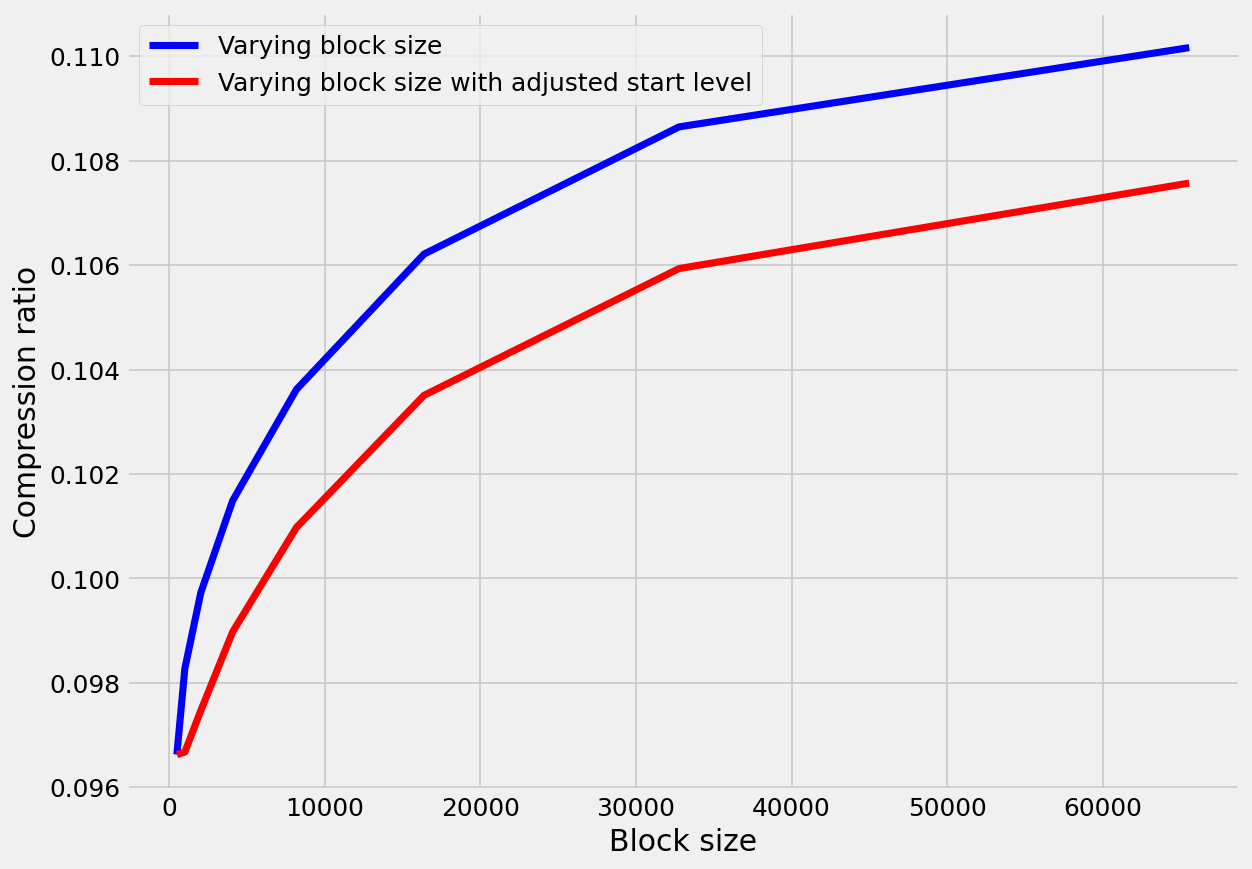

In [ ]:
plt.plot(cr_1, label = 'Varying block size', color = 'b')
plt.plot(cr_2, label = 'Varying block size with adjusted start level', color = 'r')
#plt.title('Compression ratio for different block sizes (phone accelerometer)')
plt.xlabel('Block size')
plt.ylabel('Compression ratio')
plt.legend()

In [ ]:
cl_variable_block_size_a = pd.DataFrame([[1.692979791,1.6814986670000005,1.649021874999999,1.6197794170000002,1.597576041,1.584492375,1.5825732079999995,1.6029315000000004,1.5813862079999979,1.6119982910000026],[1.2379870419999999,1.2044405420000004,1.1980906660000006,1.1633181250000009,1.1707119170000002,1.1580395419999991,1.255467166999999,1.1590613340000004,1.1730180000000026,1.169966916],[1.041760292,0.9931790829999998,0.9823513750000004,0.9713661250000003,0.9652207500000003,0.9711210000000001,0.9724809580000002,0.9686560839999991,0.9772445420000011,0.9723994580000017],[0.9445242500000002,0.9083282499999998,0.8926146660000001,0.8611611250000006,0.8797986250000003,0.864280707999999,0.8559665830000007,0.8647227910000002,0.8592235830000003,0.8779642909999996],[0.846239792,0.8560701669999999,0.8463606659999998,0.8208400419999995,0.8108171250000007,0.8183892919999991,0.8213754170000005,0.8203346249999992,0.8279864159999999,0.8208964590000001],[0.8638789999999998,0.8046370840000003,0.8058100830000008,0.8067577079999992,0.7888139589999996,0.7993353750000001,0.7932657919999997,0.7967008749999991,0.7855204170000007,0.7895239160000003],[0.859816334,0.8272695840000002,0.7876469999999998,0.7823359999999999,0.7774842919999996,0.7833217920000006,0.7850191250000016,0.782343667000001,0.7791207500000006,0.7755286249999997],[0.8430903330000001,0.826166417,0.7886671249999999,0.7844844589999997,0.7725464580000008,0.7712396249999998,0.7818948750000008,0.7737796249999995,0.7745641669999994,0.7707574999999984]])

In [ ]:
cl_variable_block_size_a['Block_size'] = block_size
cl_variable_block_size_a = cl_variable_block_size_a.set_index('Block_size')
cl_variable_block_size_a.columns = thresholds

In [ ]:
cl_2 = cl_variable_block_size_a.mean(axis=1)
ct_2 = size/cl_2

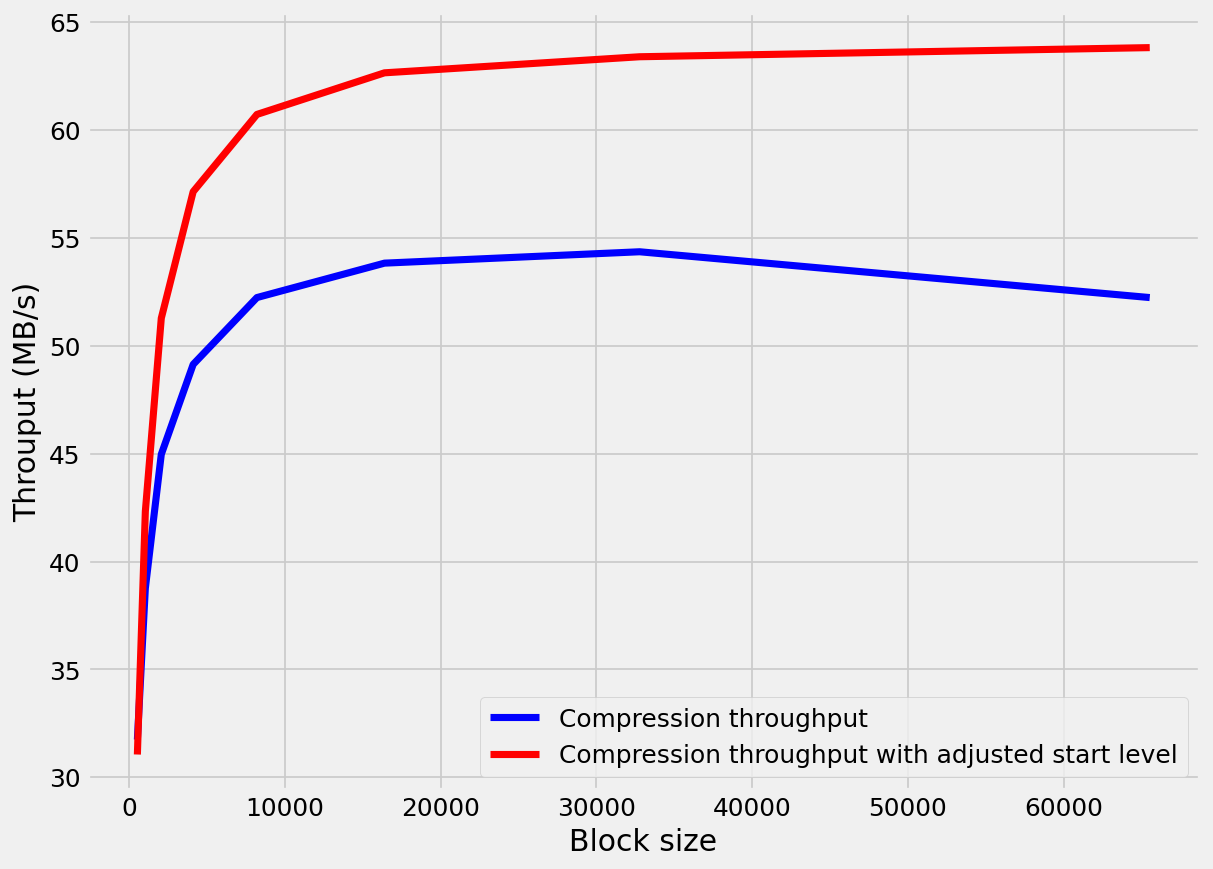

In [ ]:
plt.plot(ct_1, label = 'Compression throughput', color = 'b')
plt.plot(ct_2, label = 'Compression throughput with adjusted start level', color = 'r')
#plt.title('Average throuput for different block sizes')
plt.xlabel('Block size')
plt.ylabel('Throuput (MB/s)')
plt.legend()

In [ ]:
dl_variable_block_size_a = pd.DataFrame([[0.14752791699999968,0.17061429199999978,0.1885936250000011,0.2083232920000011,0.24400779199999967,0.26660754099999906,0.2736357920000003,0.2938339170000006,0.3411997090000014,0.370517207999999],[0.09349470900000023,0.10978174999999979,0.12168850000000031,0.13655504200000124,0.16228975000000112,0.1751348340000014,0.18033487499999978,0.19637887500000062,0.2325585409999995,0.24214800000000025],[0.069055541,0.08287608399999957,0.0947840409999996,0.10427787500000019,0.12395524999999985,0.1320612910000012,0.1362772079999992,0.14735608300000003,0.1755819160000005,0.18323108299999902],[0.058117125000000325,0.07351125000000014,0.07702741700000004,0.08734274999999947,0.10113133399999974,0.10788529199999886,0.11208891599999937,0.12386312499999974,0.14304529200000005,0.1448650409999992],[0.054884667000000054,0.06679404200000061,0.07309925000000028,0.08383329100000037,0.09345720899999854,0.10026487500000059,0.10410962499999954,0.11163491699999994,0.12865762500000066,0.12907512499999996],[0.05566970799999993,0.06921641699999981,0.07933874999999979,0.08578908299999988,0.0941442919999993,0.10170054199999967,0.10338883300000035,0.11290054200000021,0.12257216599999943,0.12110470900000081],[0.06622020899999992,0.07959750000000021,0.08776474999999984,0.0973738329999998,0.10724645900000063,0.11271166699999924,0.11343549999999958,0.1283462919999998,0.12368799999999958,0.12251574999999981],[0.07479395899999997,0.08682562499999946,0.09550537499999923,0.10927633399999959,0.11685558399999962,0.1192724579999993,0.11933304200000094,0.11990437500000084,0.12089116699999991,0.12063179200000107]])

In [ ]:
dl_variable_block_size_a['Block_size'] = block_size
dl_variable_block_size_a = dl_variable_block_size_a.set_index('Block_size')
dl_variable_block_size_a.columns = thresholds

In [ ]:
dl_2 = dl_variable_block_size_a.mean(axis=1)
dt_2 = (size)/dl_2
#dt_4 = (size)/dl_2

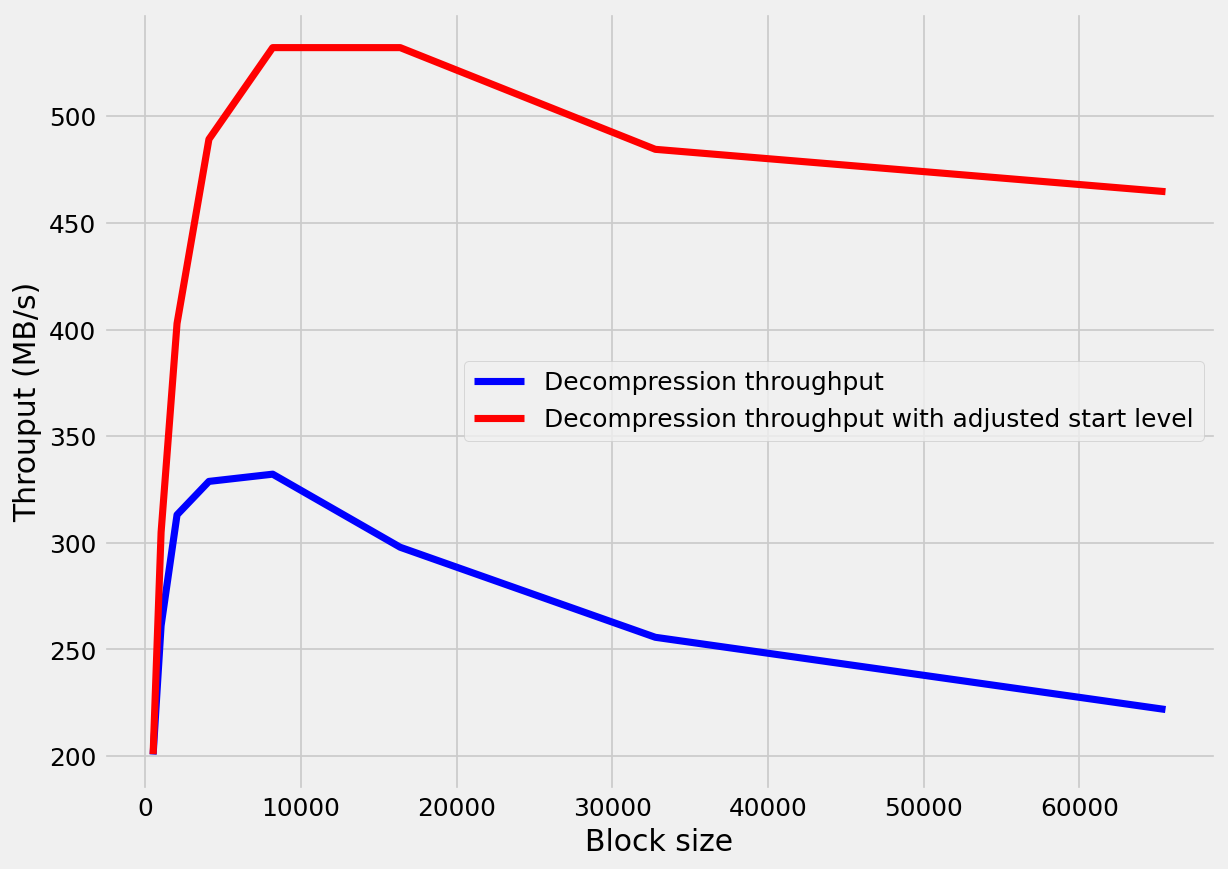

In [ ]:
plt.plot(dt_1, label = 'Decompression throughput', color = 'b')
plt.plot(dt_2, label = 'Decompression throughput with adjusted start level', color = 'r')
#plt.title('Average throuput for different block sizes')
plt.xlabel('Block size')
plt.ylabel('Throuput (MB/s)')
plt.legend()

## Varying start level

In [ ]:
start_level = [0,1,2,3,4,5,6,7,8,9,10]

In [ ]:
cr_variable_start_level = pd.DataFrame([[0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968,0.10659400622049968],[0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882,0.10655442873636882],[0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066,0.10651413599650066],[0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884,0.10646684964497884],[0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737,0.1063992182413737],[0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747,0.10627349217732747],[0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692,0.10597642262776692],[0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684,0.10526259740193684],[0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023,0.10370397567749023],[0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884,0.10079058011372884],[0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117,0.09658384323120117]])

In [ ]:
cr_variable_start_level['start_level'] = start_level
cr_variable_start_level = cr_variable_start_level.set_index('start_level')
cr_variable_start_level.columns = thresholds

No handles with labels found to put in legend.


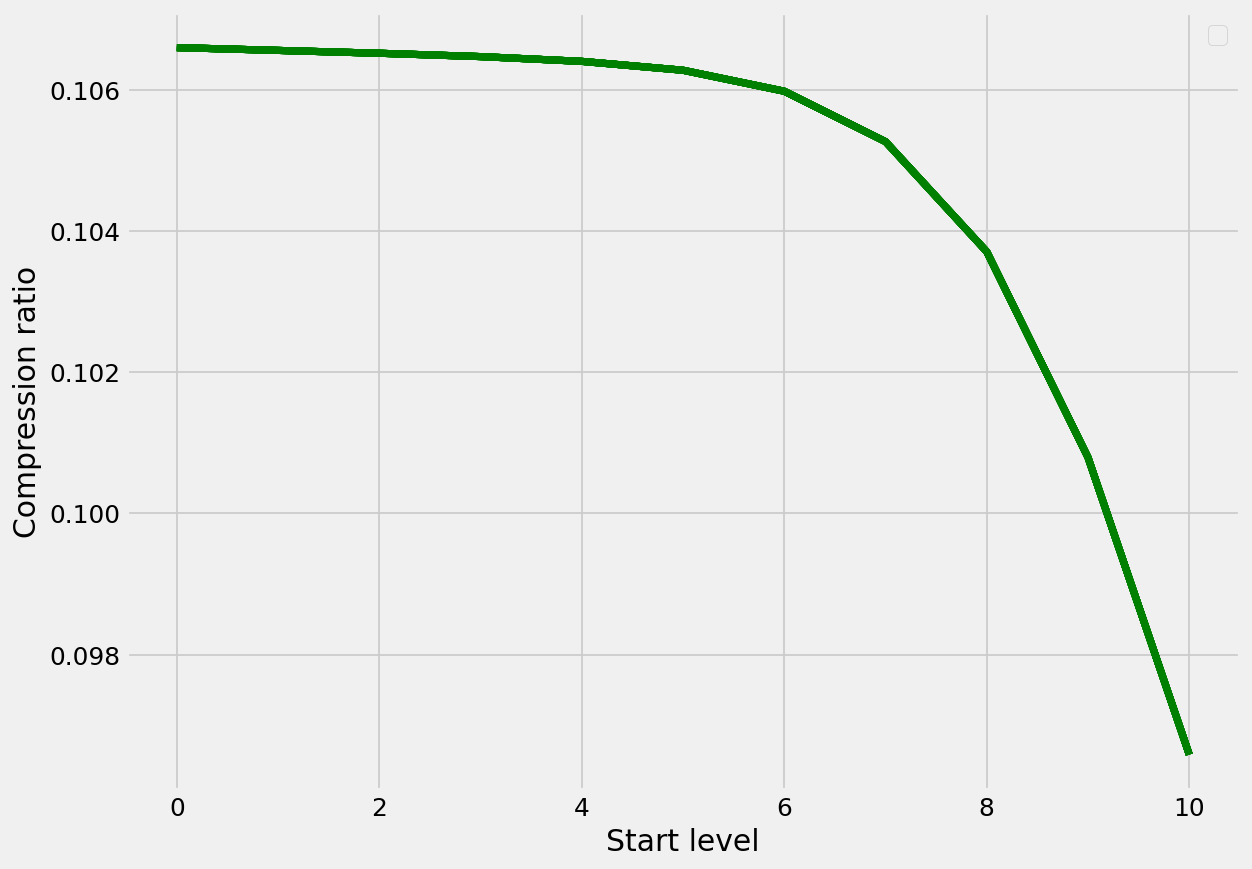

In [ ]:
#Combined
plt.plot(cr_variable_start_level, color = 'g')
#plt.title('Average throuput for different block sizes')
plt.xlabel('Start level')
plt.ylabel('Compression ratio')
plt.legend()

In [ ]:
cl_variable_start_level = pd.DataFrame([[2.503550833,2.453008917000001,2.3942078329999994,2.3787492500000003,2.391512958,2.457383042,2.381765250000001,2.425792125000001,2.5385779579999976,2.393600915999997],[2.4374370410000004,2.3491582919999994,2.319782666,2.3437970419999985,2.323317541999998,2.341140709000001,2.3266884579999996,2.331628249999998,2.335098875,2.3524150000000006],[2.3786791660000004,2.2926206670000004,2.268965834000001,2.2551713750000015,2.303857749999999,2.2780463750000024,2.2847994169999986,2.285569917,2.340545749999997,2.614723416000004],[2.307998458,2.262812375,2.2262400830000004,2.238786416,2.2545169589999983,2.347185917000001,2.250105583,2.228441042,2.238968,2.2285025409999974],[2.243617916,2.1760358330000003,2.1293012079999993,2.1406416250000007,2.156630917000001,2.1466711249999975,2.114391874999999,2.1234688330000004,2.2277506659999986,2.145962292],[2.154253541,2.3614405419999995,2.135546125000001,2.082819875,2.0708615829999992,2.055028041,2.0684362090000015,2.2064618749999987,2.112277666999997,2.2296692080000042],[2.063853084,2.01581875,1.9877868329999995,1.9886518749999986,1.988184791000002,1.9753940830000012,1.9871872079999982,1.9973602499999998,2.0154759999999996,1.9861833329999996],[1.9970955409999998,1.9219700829999997,1.914920875,1.909711584,1.9323241249999992,1.9262336660000017,1.926900749999998,1.9343393750000004,1.9093919580000005,1.9105702079999993],[1.848294083,1.8958601249999996,1.7969381670000004,1.8034477500000001,1.7990290830000006,1.8481472500000002,1.8134108749999989,1.8179769159999992,1.8068851250000009,1.798970624999999],[1.701072125,1.6923739580000001,1.6771383749999993,1.6714427500000006,1.6619856660000014,1.670761582999999,1.6596684580000023,1.6609622920000007,1.6705074579999994,1.6656546249999984],[1.5105780420000001,1.5213156670000005,1.5046884160000005,1.4925340830000007,1.4767265829999996,1.4791124159999995,1.4789498330000015,1.4687599169999999,1.4664603340000006,1.460182708999998]])

In [ ]:
cl_variable_start_level['start_level'] = start_level
cl_variable_start_level = cl_variable_start_level.set_index('start_level')
cl_variable_start_level.columns = thresholds

In [ ]:
cl_variable_start_level

,0.1500,0.1000,0.0750,0.0500,0.0250,0.0100,0.0075,0.0050,0.0025,0.0010
start_level,,,,,,,,,,
0,2.503551,2.453009,2.394208,2.378749,2.391513,2.457383,2.381765,2.425792,2.538578,2.393601
1,2.437437,2.349158,2.319783,2.343797,2.323318,2.341141,2.326688,2.331628,2.335099,2.352415
2,2.378679,2.292621,2.268966,2.255171,2.303858,2.278046,2.284799,2.285570,2.340546,2.614723
3,2.307998,2.262812,2.226240,2.238786,2.254517,2.347186,2.250106,2.228441,2.238968,2.228503
4,2.243618,2.176036,2.129301,2.140642,2.156631,2.146671,2.114392,2.123469,2.227751,2.145962
5,2.154254,2.361441,2.135546,2.082820,2.070862,2.055028,2.068436,2.206462,2.112278,2.229669
6,2.063853,2.015819,1.987787,1.988652,1.988185,1.975394,1.987187,1.997360,2.015476,1.986183
7,1.997096,1.921970,1.914921,1.909712,1.932324,1.926234,1.926901,1.934339,1.909392,1.910570
8,1.848294,1.895860,1.796938,1.803448,1.799029,1.848147,1.813411,1.817977,1.806885,1.798971


In [ ]:
ct_level = cl_variable_start_level.mean(axis=1)
ct_level = size/ct_level

In [ ]:
ct_level

start_level
0     20.696955
1     21.453610
2     21.598596
3     22.286641
4     23.296642
5     23.435138
6     25.158165
7     26.100694
8     27.610552
9     30.081560
10    33.871809
dtype: float64

No handles with labels found to put in legend.


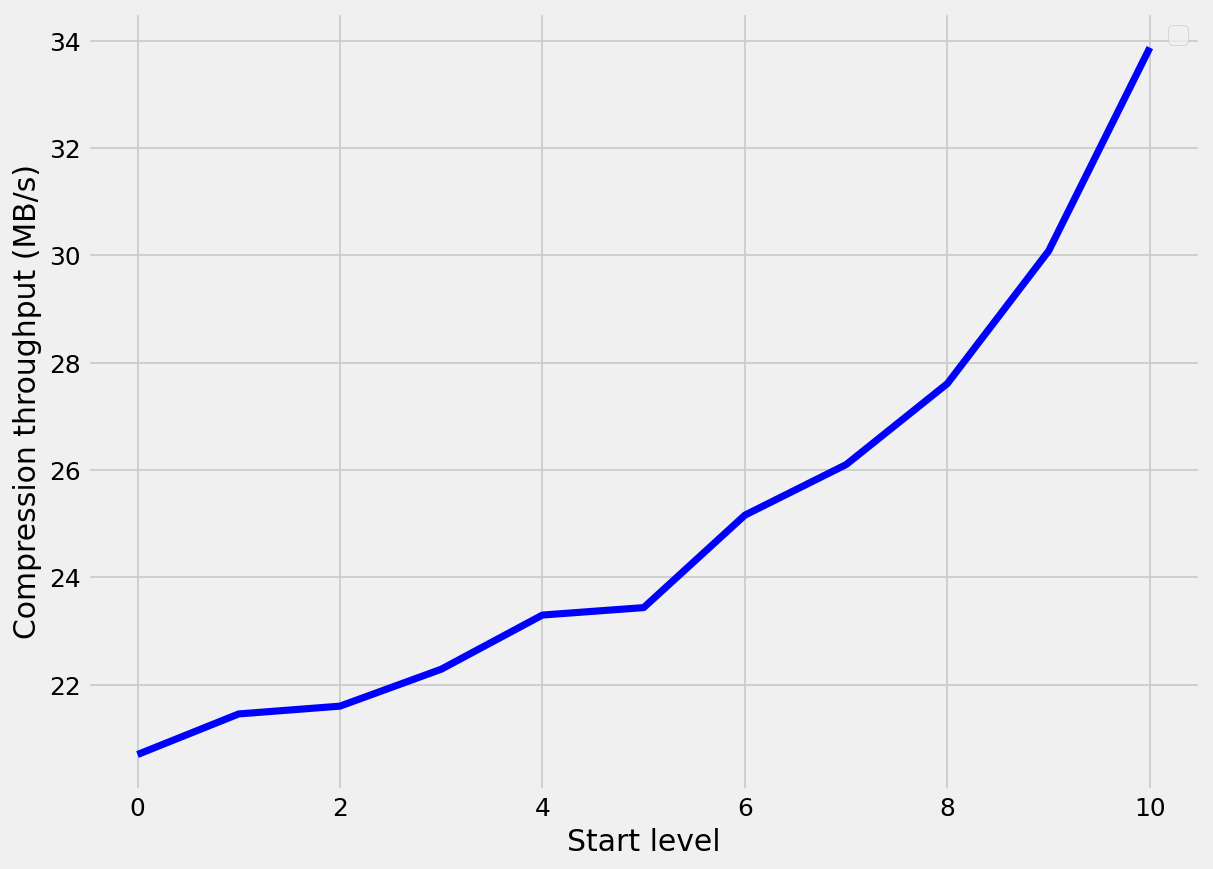

In [ ]:
#Combined
plt.plot(ct_level, color = 'b')
#plt.title('Average throuput for different block sizes')
plt.xlabel('Start level')
plt.ylabel('Compression throughput (MB/s)')
plt.legend()

In [ ]:
dl_variable_start_level = pd.DataFrame([[0.27844837499999997,0.3258038750000001,0.3556045000000001,0.40300929200000013,0.47174691699999727,0.5101205419999992,0.5397027090000002,0.5737827080000031,0.6265897079999974,0.6666399169999977],[0.2782121660000003,0.31719495799999997,0.3564874170000003,0.3967202499999978,0.460570624999999,0.5028768749999983,0.5198055000000004,0.5595469170000023,0.6065099170000039,0.6076742500000023],[0.261749,0.2950419999999987,0.3241674999999997,0.37414408299999913,0.42465279199999983,0.46873029099999997,0.49204654200000064,0.5488084999999998,0.5637103749999994,0.5749278330000038],[0.24528795799999958,0.27358174999999996,0.3024032500000011,0.3512642909999997,0.39675112500000154,0.4375889999999991,0.45342695800000143,0.4892555420000022,0.5238458330000029,0.5269390420000022],[0.20368629100000035,0.24680124999999986,0.2809717499999991,0.31734404099999836,0.3626533340000009,0.39793054099999736,0.4121557090000003,0.4463545420000017,0.48110087500000276,0.483123667000001],[0.20161349999999967,0.22958516699999976,0.254745625,0.2834132500000006,0.3301958330000012,0.3628243750000024,0.38206933400000054,0.4026572910000006,0.4463795829999988,0.44738962499999957],[0.16143941700000042,0.1979603749999992,0.22318183299999994,0.2538636659999991,0.29769549999999967,0.32566054199999783,0.34652254100000235,0.36341924999999975,0.39629520799999796,0.40545883400000093],[0.14045391700000032,0.17397725000000008,0.19436166599999893,0.22441720900000028,0.26587229200000095,0.29087687500000214,0.3052977080000012,0.3236238339999993,0.3529230840000004,0.3595926250000012],[0.11890504199999974,0.15122199999999975,0.16620854199999968,0.1941727499999999,0.24034029100000076,0.2569768329999995,0.2625636250000021,0.27823370799999836,0.3048875829999993,0.3099822500000009],[0.09844329200000024,0.12193087500000033,0.13761650000000003,0.16193991699999977,0.19746520799999878,0.2151035830000012,0.2203585419999996,0.2313118749999994,0.25957104100000095,0.2628486670000001],[0.08517495800000008,0.1008074170000004,0.11329341699999951,0.13271708399999937,0.1631480829999994,0.18086879200000183,0.18177208299999847,0.18883770800000121,0.20968408300000263,0.2150521249999997]])

In [ ]:
dl_variable_start_level['start_level'] = start_level
dl_variable_start_level = dl_variable_start_level.set_index('start_level')
dl_variable_start_level.columns = thresholds

In [ ]:
dt_level = dl_variable_start_level.mean(axis=1)
dt_level = size/dt_level

No handles with labels found to put in legend.


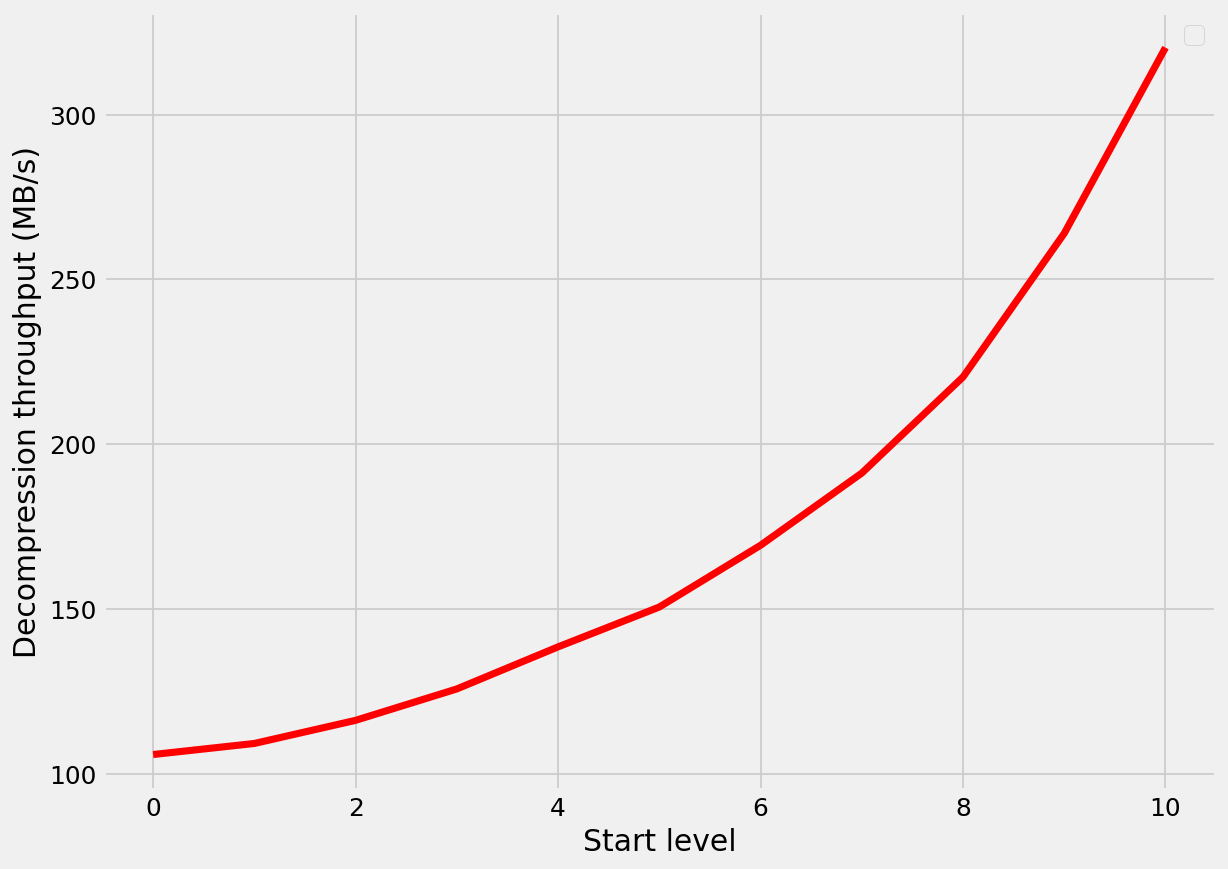

In [ ]:
#Combined
plt.plot(dt_level, color = 'r')
#plt.title('Average throuput for different block sizes')
plt.xlabel('Start level')
plt.ylabel('Decompression throughput (MB/s)')
plt.legend()

## Pooling function

In [ ]:
#pooling functions
#mean
cr_mean = [0.009048779805501303,0.007186571756998698,0.009780565897623697,0.012034416198730469,0.02099450429280599,0.03419176737467448,0.04157193501790365,0.05206775665283203,0.0721880594889323,0.10500717163085938]
#median
cr_median = [0.00915368398030599,0.0072739919026692705,0.009916941324869791,0.012224833170572916,0.021250406901041668,0.03444798787434896,0.04184309641520182,0.05231157938639323,0.07240517934163411,0.10526657104492188]
#midrank
cr_midrank = [0.008975346883138021,0.007101376851399739,0.009669939676920572,0.011909166971842447,0.020839691162109375,0.03393681844075521,0.04129632314046224,0.05175177256266276,0.07178529103597005,0.10458183288574219]

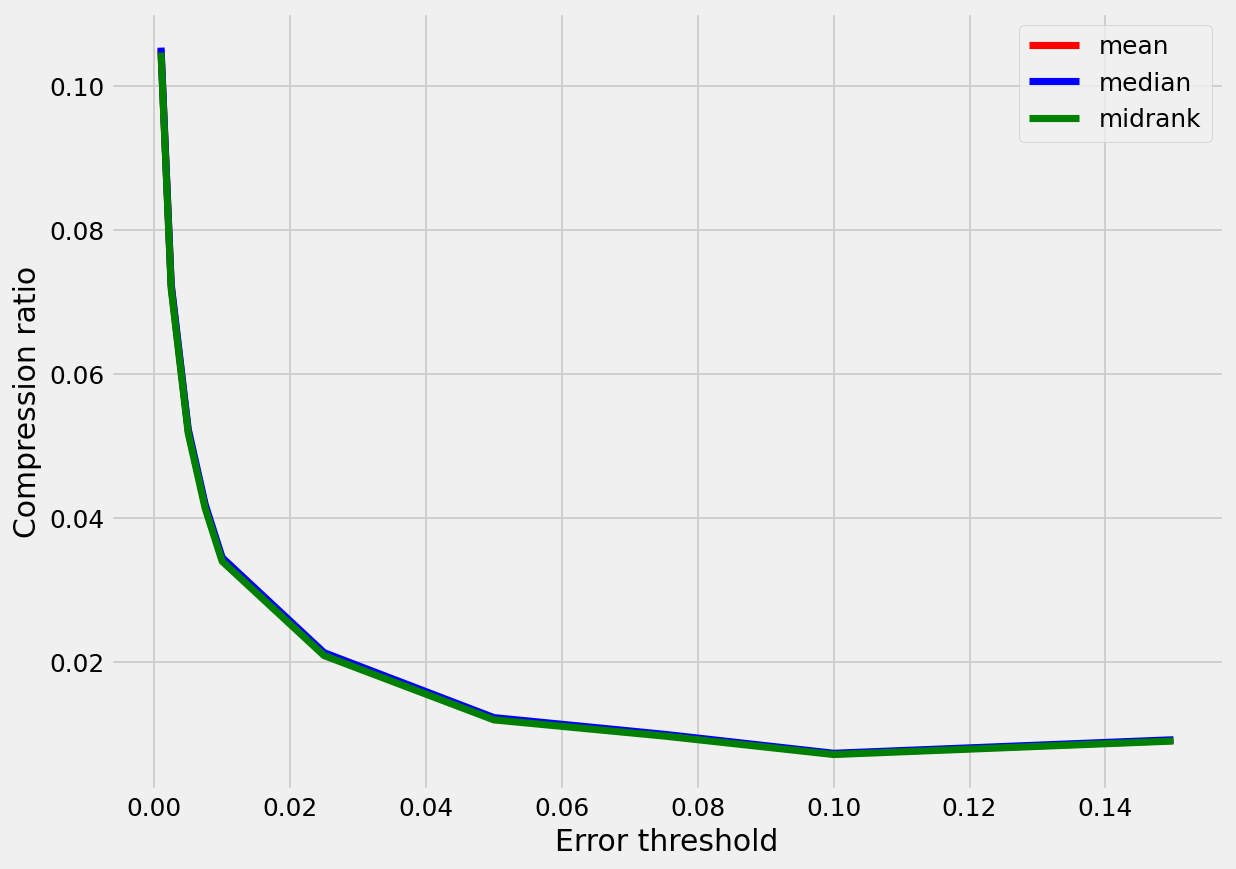

In [ ]:
#Combined
plt.plot(thresholds,cr_mean, color = 'r', label = 'mean')
plt.plot(thresholds,cr_median, color = 'b', label = 'median')
plt.plot(thresholds,cr_midrank, color = 'g', label = 'midrank')
plt.legend(title = 'Pooling function')
plt.ylabel('Compression ratio')
plt.xlabel('Error threshold')
plt.legend()

In [ ]:
#pooling functions
#mean
cl_mean = np.array([0.24629625000000033,0.21477783299999942,0.23996533299999978,0.25049958300000075,0.2866284170000002,0.3206636249999999,0.32986499999999985,0.33811649999999993,0.36034662500000003,0.39047591599999976])
ct_mean = size/cl_mean
#median
cl_median = np.array([0.34338183399999966,0.32130895900000045,0.3398844589999994,0.3431298750000007,0.3942359169999996,0.4220467500000007,0.42799424999999935,0.4357457920000005,0.455547833999999,0.4877981250000012])
ct_median = size/cl_median
#midrank
cl_midrank =np.array([0.3900344579999997,0.3564478330000007,0.3691497909999999,0.3783974160000003,0.43106358300000025,0.456039917,0.46882158299999865,0.4774580000000004,0.5102781249999992,0.5392755419999986])
ct_midrank = size/cl_midrank

Text(0, 0.5, 'Compression throughput (MB/s)')

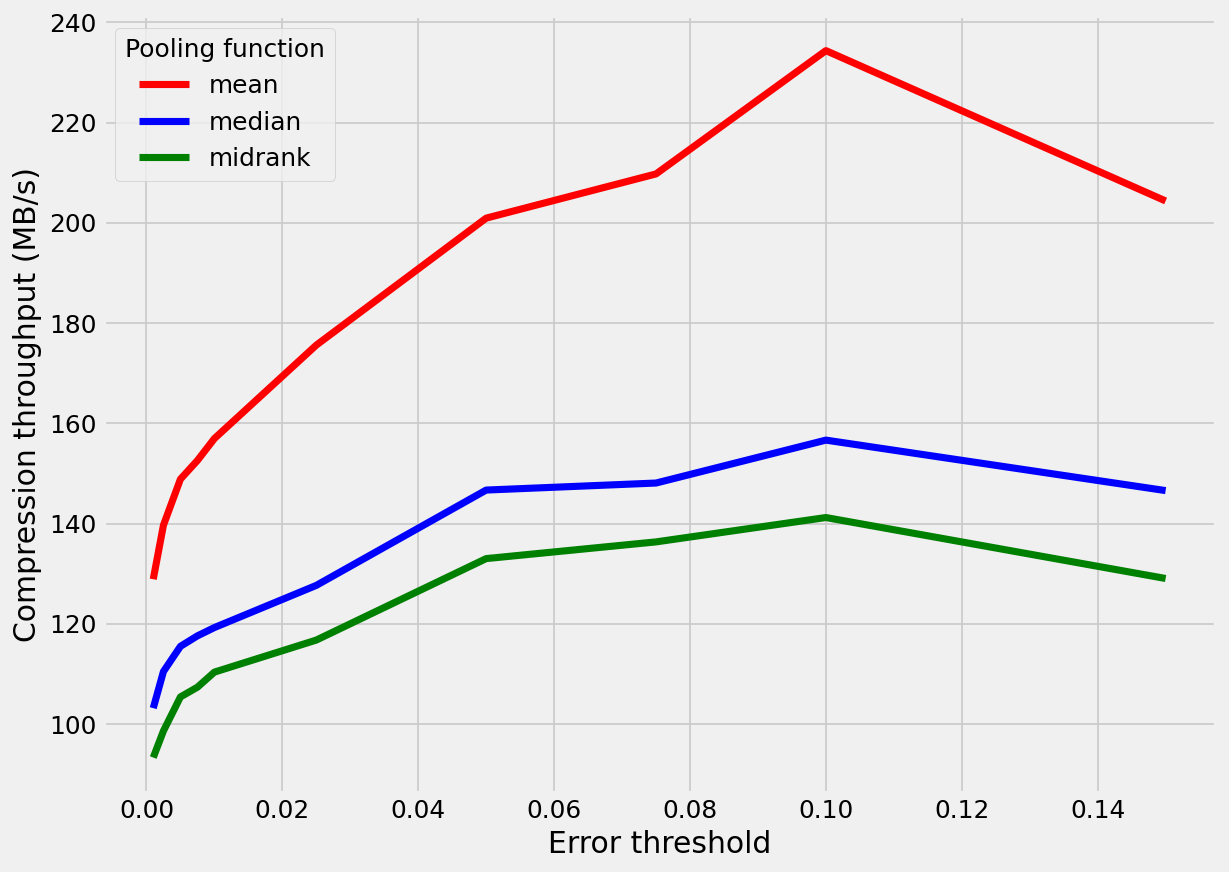

In [ ]:
#Combined
plt.plot(thresholds, ct_mean, color = 'r', label = 'mean')
plt.plot(thresholds, ct_median, color = 'b', label = 'median')
plt.plot(thresholds, ct_midrank, color = 'g', label = 'midrank')
plt.legend(title = 'Pooling function')
plt.xlabel('Error threshold')
plt.ylabel('Compression throughput (MB/s)')

In [ ]:
#pooling functions
#mean
dl_mean = np.array([0.11981883400000015,0.1480132920000008,0.16363791700000085,0.18938312500000087,0.21501883400000033,0.22268800000000155,0.23263575000000003,0.2356088750000005,0.2544242499999996,0.25015262499999835])
dt_mean = size/dl_mean
#median
dl_median = np.array([0.13073120800000027,0.14997204099999983,0.16637799999999991,0.20456183299999964,0.21159283299999743,0.22652733299999994,0.23466050000000038,0.23689375000000013,0.24716312500000015,0.25470583399999924])
dt_median = size/dl_median
#midrank
dl_midrank = np.array([0.10517333299999976,0.13918850000000038,0.16315200000000019,0.1894962919999994,0.2109543330000001,0.24012204099999934,0.2320794159999977,0.24314504200000187,0.25150574999999975,0.2512074579999961])
dt_midrank = size/dl_midrank

Text(0, 0.5, 'Decompression throughput (MB/s)')

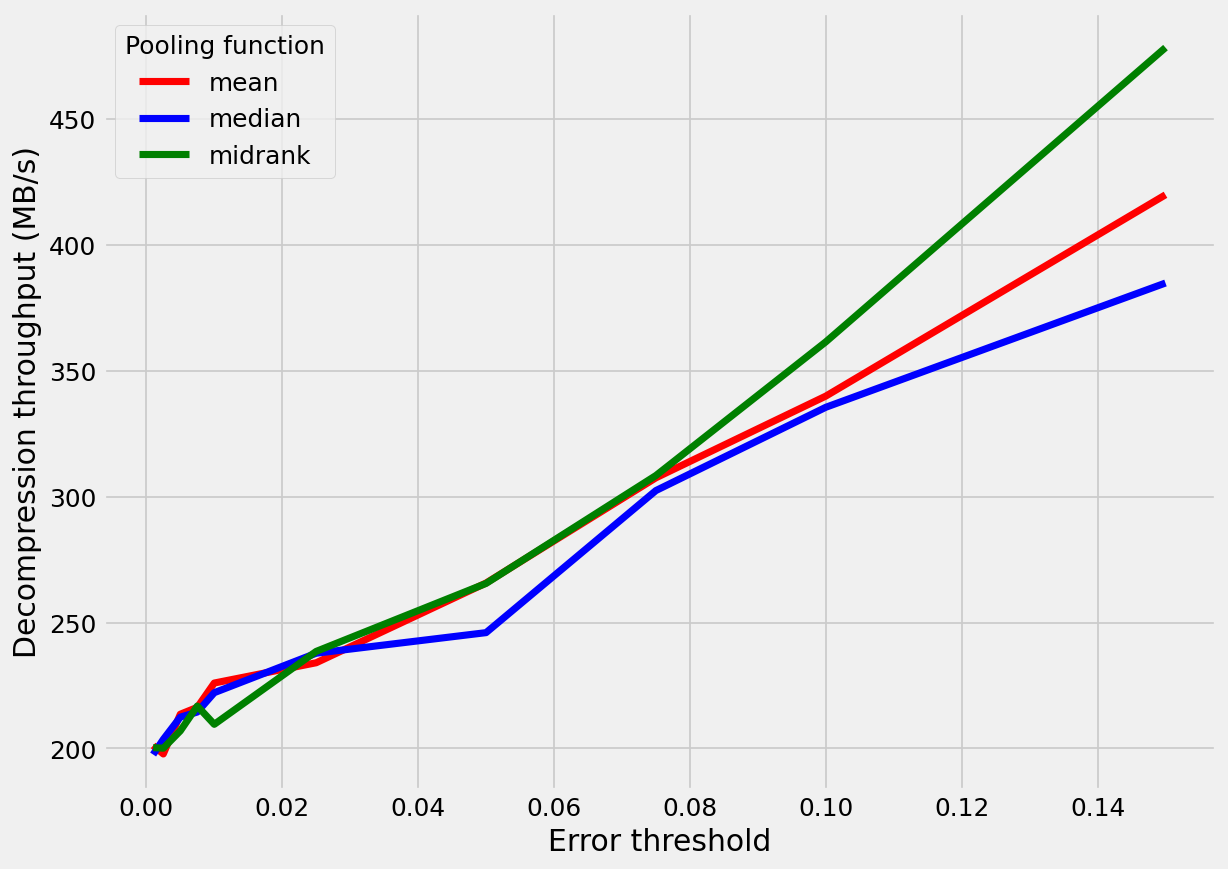

In [ ]:
#Combined
plt.plot(thresholds, dt_mean, color = 'r', label = 'mean')
plt.plot(thresholds, dt_median, color = 'b', label = 'median')
plt.plot(thresholds, dt_midrank, color = 'g', label = 'midrank')
plt.legend(title = 'Pooling function')
plt.xlabel('Error threshold')
plt.ylabel('Decompression throughput (MB/s)')

### Downstream compression

## Stacked plot

In [ ]:
plot_phone_a_cr = cr_phone_a.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_phone_a_cr['data_set'] = 'phone_a'
#plot_phone_cr.plot.bar(stacked=True)

In [ ]:
plot_phone_g_cr = cr_phone_gy.drop(['Q','IdGZ', 'Glz', 'APC'], axis = 1).T
plot_phone_g_cr['data_set'] = 'phone_g'
#plot_phone_g_cr.plot.bar(stacked=True)

In [ ]:
plot_final =  pd.concat([plot_phone_a_cr, plot_phone_g_cr], axis=0)

In [ ]:
plot_final

Thresholds,0.15,0.1,0.075,0.05,0.025,0.01,0.0075,0.005,0.0025,0.001,data_set
QGZ,0.007723,0.008948,0.012368,0.023756,0.040068,0.068776,0.060339,0.069917,0.106760,0.127683,phone_a
QTRC,0.004794,0.005875,0.007140,0.008746,0.014455,0.024822,0.029400,0.035589,0.051480,0.075815,phone_a
Spz,0.005632,0.006331,0.008006,0.010497,0.016389,0.027412,0.031871,0.036826,0.055582,0.076358,phone_a
HIRE,0.007823,0.009162,0.010887,0.013547,0.022781,0.037755,0.044820,0.057391,0.081645,0.116362,phone_a
QGZ,0.004378,0.005290,0.007372,0.015054,0.030194,0.058884,0.045746,0.055585,0.088540,0.103588,phone_g
QTRC,0.003335,0.004079,0.004894,0.005934,0.010606,0.014167,0.017015,0.021394,0.030001,0.044842,phone_g
Spz,0.002840,0.004424,0.005511,0.006321,0.012409,0.015166,0.018269,0.022573,0.028283,0.041107,phone_g
HIRE,0.006676,0.006135,0.007763,0.009630,0.017024,0.025621,0.030102,0.040739,0.057189,0.084967,phone_g


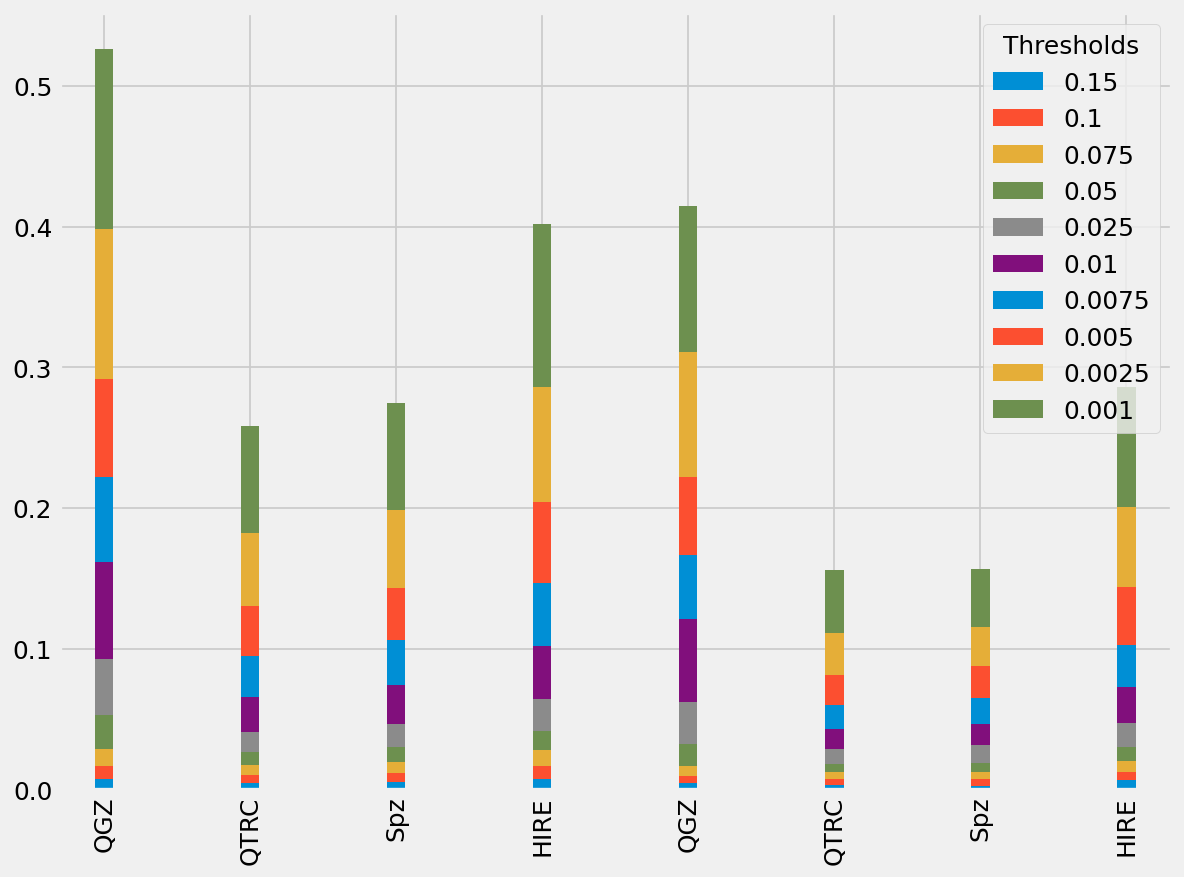

In [ ]:
width = 1/8
plot_final.plot(kind='bar', width=width, stacked = True)

## Table Compression

In [ ]:
cr_phone_a_final_table
cr_phone_gy_final_table
cr_watch_gy_final_table
cr_watch_a_final_table
cr_sensor_ht_final_table
cr_power_final_table
cr_bitcoin_final_table

IdGZ    2.306093
Q       1.000095
QGZ     0.175028
QTRC    0.115875
Spz     0.164189
APC     0.296028
Glz     8.067142
HIRE    0.060783
dtype: float64

In [ ]:
cr_phone_a_final_table

IdGZ    5.553575
Q       1.000305
QGZ     0.526338
QTRC    0.258114
Spz     0.274902
APC     1.844492
Glz     8.183688
HIRE    0.116362
dtype: float64

In [ ]:
cr_table = pd.merge(cr_phone_a_final_table.to_frame(), cr_phone_gy_final_table.to_frame(), left_index=True, right_index=True)

In [ ]:
cr_table = cr_table.merge(cr_watch_gy_final_table.to_frame(), left_index=True, right_index=True)
cr_table = cr_table.merge(cr_watch_a_final_table.to_frame(), left_index=True, right_index=True)
cr_table = cr_table.merge(cr_sensor_ht_final_table.to_frame(), left_index=True, right_index=True)
cr_table = cr_table.merge(cr_power_final_table.to_frame(), left_index=True, right_index=True)
cr_table = cr_table.merge(cr_bitcoin_final_table.to_frame(), left_index=True, right_index=True)

In [ ]:
cr_table

,0_x,0_y,0_x,0_y,0_x,0_y,0
IdGZ,5.553575,4.023282,4.497520,4.643243,5.997271,2.171593,2.306093
Q,1.000305,1.000305,1.000305,1.000305,46.161679,1.000044,1.000095
QGZ,0.526338,0.414631,0.350649,0.431056,267.924998,0.436486,0.175028
QTRC,0.258114,0.156268,0.119167,0.170033,1611.743110,0.183097,0.115875
Spz,0.274902,0.156904,0.118768,0.178737,2011.488523,0.221617,0.164189
APC,1.844492,1.003474,0.985786,1.092893,223.486366,0.551360,0.296028
Glz,8.183688,5.919840,6.389346,8.067142,6.029152,2.955549,8.067142
HIRE,0.116362,0.084967,0.069550,0.085054,2229.260830,0.090957,0.060783


In [ ]:
cr_table.columns = ['PA', 'PG', 'WG', 'WA', 'SHAM', 'HIEPC', 'BC']

In [ ]:
cr_table = cr_table.round(3)

In [ ]:
print(cr_table.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &     PA &     PG &     WG &     WA &      SHAM &  HIEPC &     BC \\
\midrule
IdGZ &  5.554 &  4.023 &  4.498 &  4.643 &     5.997 &  2.172 &  2.306 \\
Q    &  1.000 &  1.000 &  1.000 &  1.000 &    46.162 &  1.000 &  1.000 \\
QGZ  &  0.526 &  0.415 &  0.351 &  0.431 &   267.925 &  0.436 &  0.175 \\
QTRC &  0.258 &  0.156 &  0.119 &  0.170 &  1611.743 &  0.183 &  0.116 \\
Spz  &  0.275 &  0.157 &  0.119 &  0.179 &  2011.489 &  0.222 &  0.164 \\
APC  &  1.844 &  1.003 &  0.986 &  1.093 &   223.486 &  0.551 &  0.296 \\
Glz  &  8.184 &  5.920 &  6.389 &  8.067 &     6.029 &  2.956 &  8.067 \\
HIRE &  0.116 &  0.085 &  0.070 &  0.085 &  2229.261 &  0.091 &  0.061 \\
\bottomrule
\end{tabular}



Text(0, 0.5, 'Compression ratio')

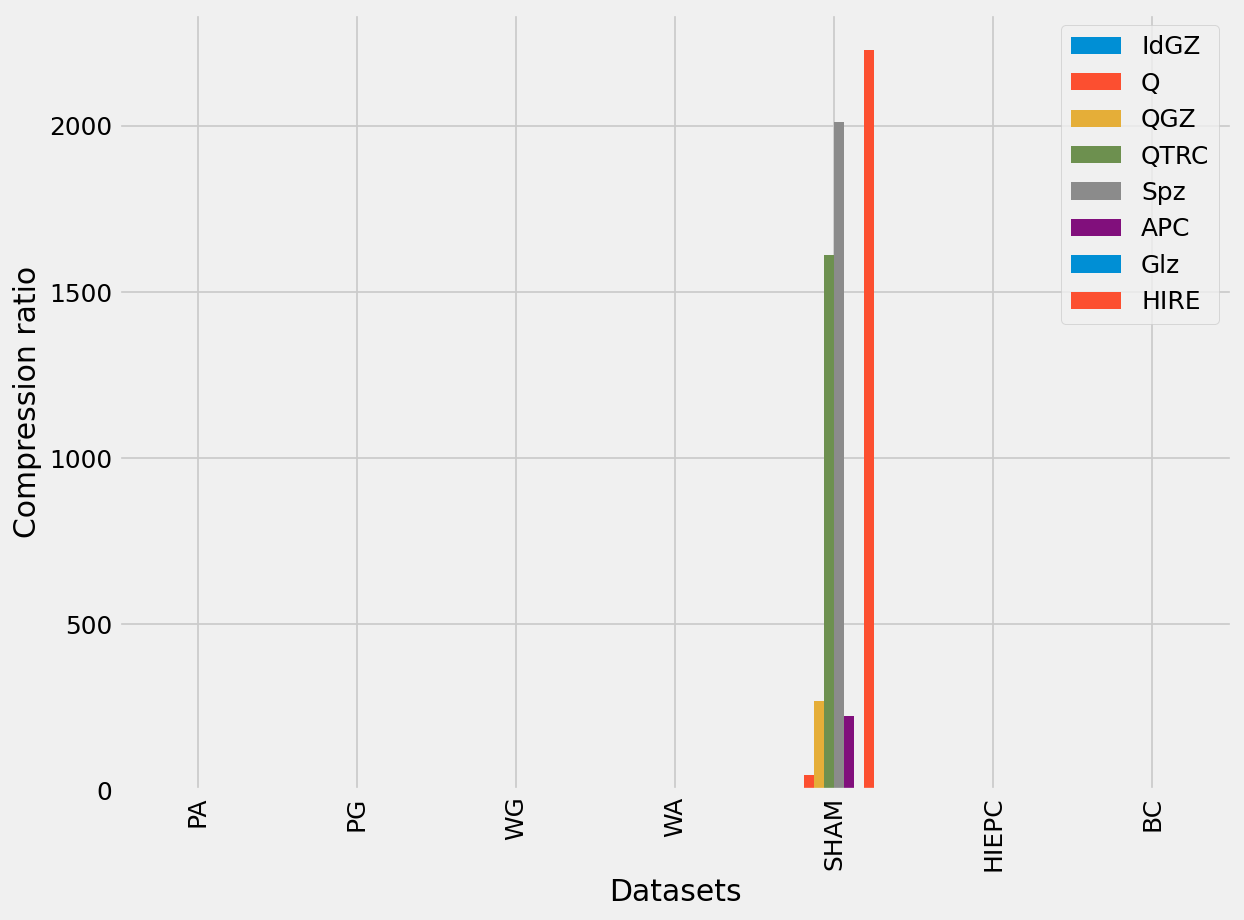

In [ ]:
cr_table.T.plot(kind='bar')
plt.xlabel('Datasets')
plt.ylabel('Compression ratio')

## Compression latency plot

In [ ]:
sensor_ht_size = (524288/928991)*81.8
power_size = (524288/2049280)*114.8
bitcoin_size = (1048576/2916697)*140

In [ ]:
cl_table = pd.merge(cl_phone_a_final_table.to_frame(), cl_phone_gy_final_table.to_frame(), left_index=True, right_index=True)
#pd.merge(df1, df2, left_index=True, right_index=True)

In [ ]:
cl_table

,0_x,0_y
IdGZ,82.855172,27.072718
Q,1702.831733,3855.501372
QGZ,1949.139464,101.998294
QTRC,134.161849,11.031185
Spz,15.740466,6.338917
APC,27.287278,50.156939
Glz,3.141621,3.360703
HIRE,1681.547373,264.996404


In [ ]:
cl_table = cl_table.merge(cl_watch_gy_final_table.to_frame(), left_index=True, right_index=True)
cl_table = cl_table.merge(cl_watch_a_final_table.to_frame(), left_index=True, right_index=True)
cl_table = cl_table.merge(cl_sensor_ht_final_table.to_frame(), left_index=True, right_index=True)
cl_table = cl_table.merge(cl_power_final_table.to_frame(), left_index=True, right_index=True)
cl_table = cl_table.merge(cl_bitcoin_final_table.to_frame(), left_index=True, right_index=True)

In [ ]:
cl_table

,0_x,0_y,0_x,0_y,0_x,0_y,0
IdGZ,82.855172,27.072718,29.048014,29.286075,2.846634,2.025186,1.111161
Q,1702.831733,3855.501372,2628.499587,3648.023034,454.054729,399.621217,419.205218
QGZ,1949.139464,101.998294,111.153967,68.800211,36.372215,3.553931,1.156947
QTRC,134.161849,11.031185,11.054712,10.550145,1.553075,1.399069,1.521808
Spz,15.740466,6.338917,6.512338,6.347145,0.831388,0.831844,0.797278
APC,27.287278,50.156939,51.056897,46.053144,223.486366,52.368687,138.885004
Glz,3.141621,3.360703,3.091640,3.051677,0.276760,0.548988,3.051674
HIRE,1681.547373,264.996404,213.691446,250.602509,44.931561,14.538980,26.207238


In [ ]:
cl_table.columns = ['PA', 'PG', 'WG', 'WA', 'SHAM', 'HIEPC', 'BC']

In [ ]:
cl_table = cl_table.round(0)

In [ ]:
print(cl_table.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &      PA &      PG &      WG &      WA &   SHAM &  HIEPC &     BC \\
\midrule
IdGZ &    83.0 &    27.0 &    29.0 &    29.0 &    3.0 &    2.0 &    1.0 \\
Q    &  1703.0 &  3856.0 &  2628.0 &  3648.0 &  454.0 &  400.0 &  419.0 \\
QGZ  &  1949.0 &   102.0 &   111.0 &    69.0 &   36.0 &    4.0 &    1.0 \\
QTRC &   134.0 &    11.0 &    11.0 &    11.0 &    2.0 &    1.0 &    2.0 \\
Spz  &    16.0 &     6.0 &     6.0 &     6.0 &    1.0 &    1.0 &    1.0 \\
APC  &    27.0 &    50.0 &    51.0 &    46.0 &  224.0 &   52.0 &  139.0 \\
Glz  &     3.0 &     3.0 &     3.0 &     3.0 &    0.0 &    0.0 &    3.0 \\
HIRE &  1682.0 &   265.0 &   214.0 &   251.0 &   45.0 &   14.0 &   26.0 \\
\bottomrule
\end{tabular}



## Decompression table

In [ ]:
dl_phone_a_final_table

IdGZ      282.444973
Q       24811.603824
QGZ       609.622001
QTRC      105.175584
Spz        64.548519
HIRE      284.492203
APC       272.872779
Glz         0.023423
dtype: float64

In [ ]:
dl_table = pd.merge(dl_phone_a_final_table.to_frame(), dl_phone_gy_final_table.to_frame(), left_index=True, right_index=True)
#pd.merge(df1, df2, left_index=True, right_index=True)

In [ ]:
dl_table = dl_table.merge(dl_watch_gy_final_table.to_frame(), left_index=True, right_index=True)
dl_table = dl_table.merge(dl_watch_a_final_table.to_frame(), left_index=True, right_index=True)
dl_table = dl_table.merge(dl_sensor_ht_final_table.to_frame(), left_index=True, right_index=True)
dl_table = dl_table.merge(dl_power_final_table.to_frame(), left_index=True, right_index=True)
dl_table = dl_table.merge(dl_bitcoin_final_table.to_frame(), left_index=True, right_index=True)

In [ ]:
dl_table.columns = ['PA', 'PG', 'WG', 'WA', 'SHAM', 'HIEPC', 'BC']

In [ ]:
dl_table

,PA,PG,WG,WA,SHAM,HIEPC,BC
IdGZ,282.444973,1013.537309,971.403207,906.033152,96.519864,135.995753,146.612447
Q,24811.603824,24235.252739,20942.414554,21598.267691,1118.598802,1381.636504,1566.188697
QGZ,609.622001,25827.135323,15050.360152,14482.867300,963.722476,1282.831511,1320.491714
QTRC,105.175584,1451.522241,1656.710595,1514.451219,480.447785,197.023462,285.379892
Spz,64.548519,163.003601,160.472334,160.989999,21.509585,21.532439,21.439692
HIRE,284.492203,1927.795143,1923.046716,1925.649135,247.303794,72.732260,217.073413
APC,272.872779,501.569395,510.568974,460.531442,2234.863661,523.686872,1388.850039
Glz,0.023423,85.021164,0.023762,0.021756,0.001552,0.003452,0.021756


In [ ]:
dl_table = dl_table.round(2)

In [ ]:
print(dl_table.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &        PA &        PG &        WG &        WA &     SHAM &    HIEPC &       BC \\
\midrule
IdGZ &    282.44 &   1013.54 &    971.40 &    906.03 &    96.52 &   136.00 &   146.61 \\
Q    &  24811.60 &  24235.25 &  20942.41 &  21598.27 &  1118.60 &  1381.64 &  1566.19 \\
QGZ  &    609.62 &  25827.14 &  15050.36 &  14482.87 &   963.72 &  1282.83 &  1320.49 \\
QTRC &    105.18 &   1451.52 &   1656.71 &   1514.45 &   480.45 &   197.02 &   285.38 \\
Spz  &     64.55 &    163.00 &    160.47 &    160.99 &    21.51 &    21.53 &    21.44 \\
HIRE &    284.49 &   1927.80 &   1923.05 &   1925.65 &   247.30 &    72.73 &   217.07 \\
APC  &    272.87 &    501.57 &    510.57 &    460.53 &  2234.86 &   523.69 &  1388.85 \\
Glz  &      0.02 &     85.02 &      0.02 &      0.02 &     0.00 &     0.00 &     0.02 \\
\bottomrule
\end{tabular}

